In [1]:
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
data = sns.load_dataset("penguins")

In [3]:
data[:5]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [4]:
data.shape


(344, 7)

In [5]:
# Bu kod, seaborn kütüphanesini kullanarak grafiklerin görünümünü değiştirmek için gerekli olan tema ayarlarını yapar.
sns.set_theme()

# Bu satır, grafiklerin dpi (dots per inch - inç başına nokta) değerini 300 olarak ayarlar.
sns.set(rc={"figure.dpi": 300})

# Bu satır, grafiklerin genişlik ve yükseklik ölçülerini (inç cinsinden) belirler. Burada genişlik 6 inç, yükseklik 3 inç olarak ayarlanmış.
sns.set(rc={"figure.figsize": (6, 3)})


Text(0.5, 1.0, 'Bill Length vs Bill Depth')

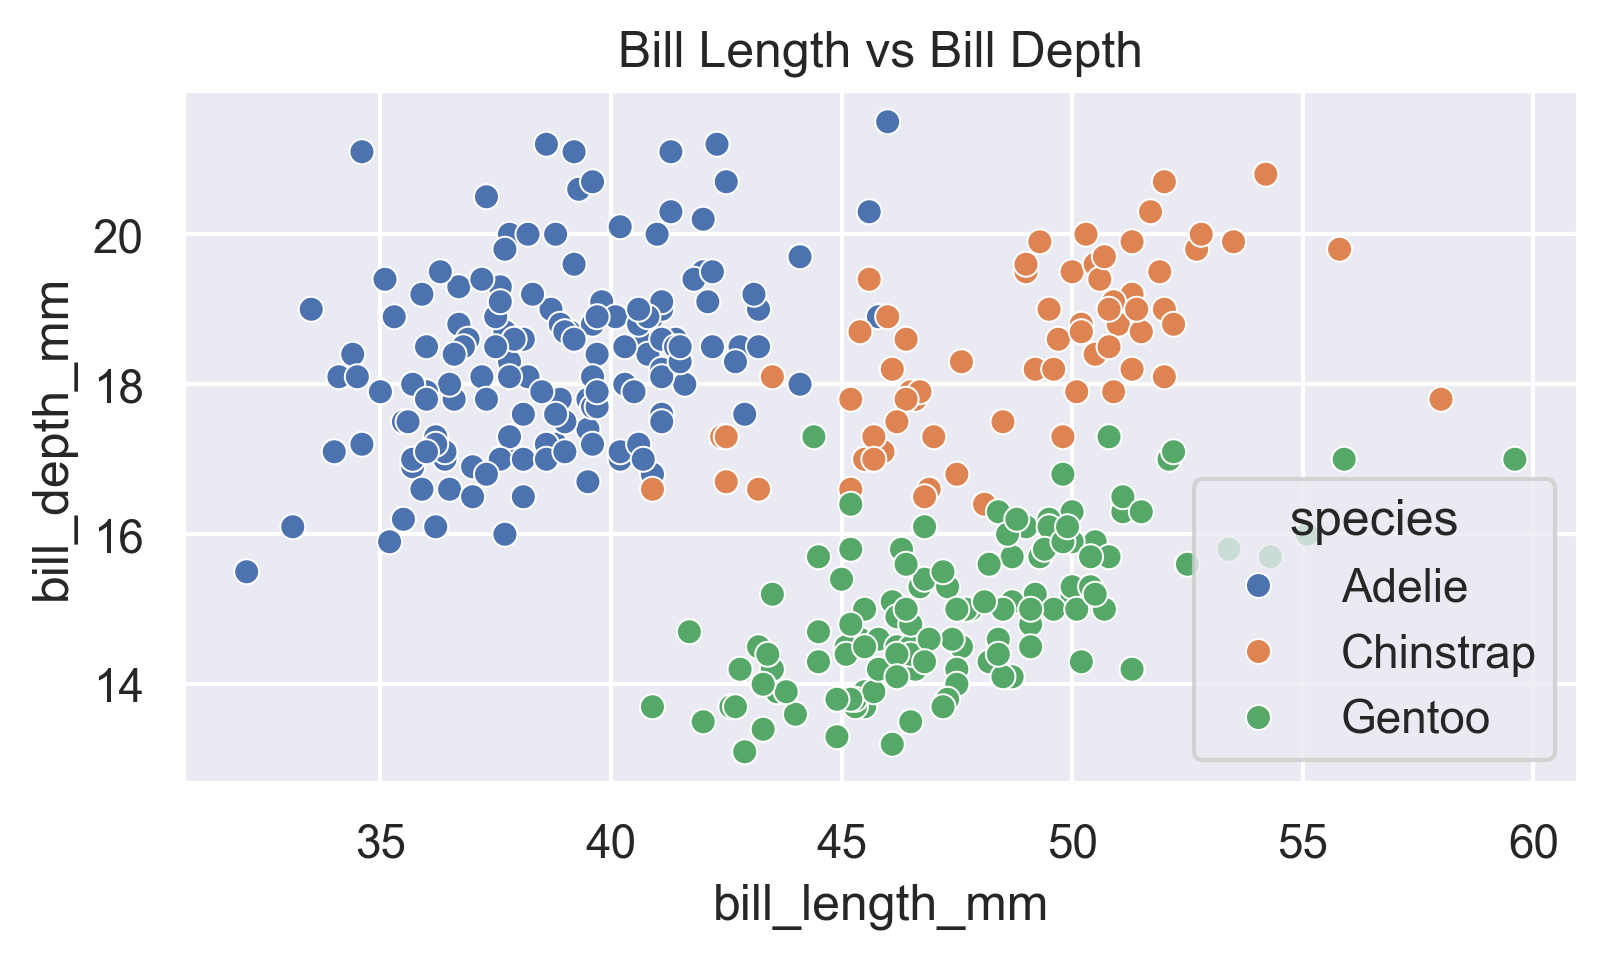

In [6]:
# Scatter plot çizimi
scatter = sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=data, hue="species")
scatter.set_title("Bill Length vs Bill Depth")

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

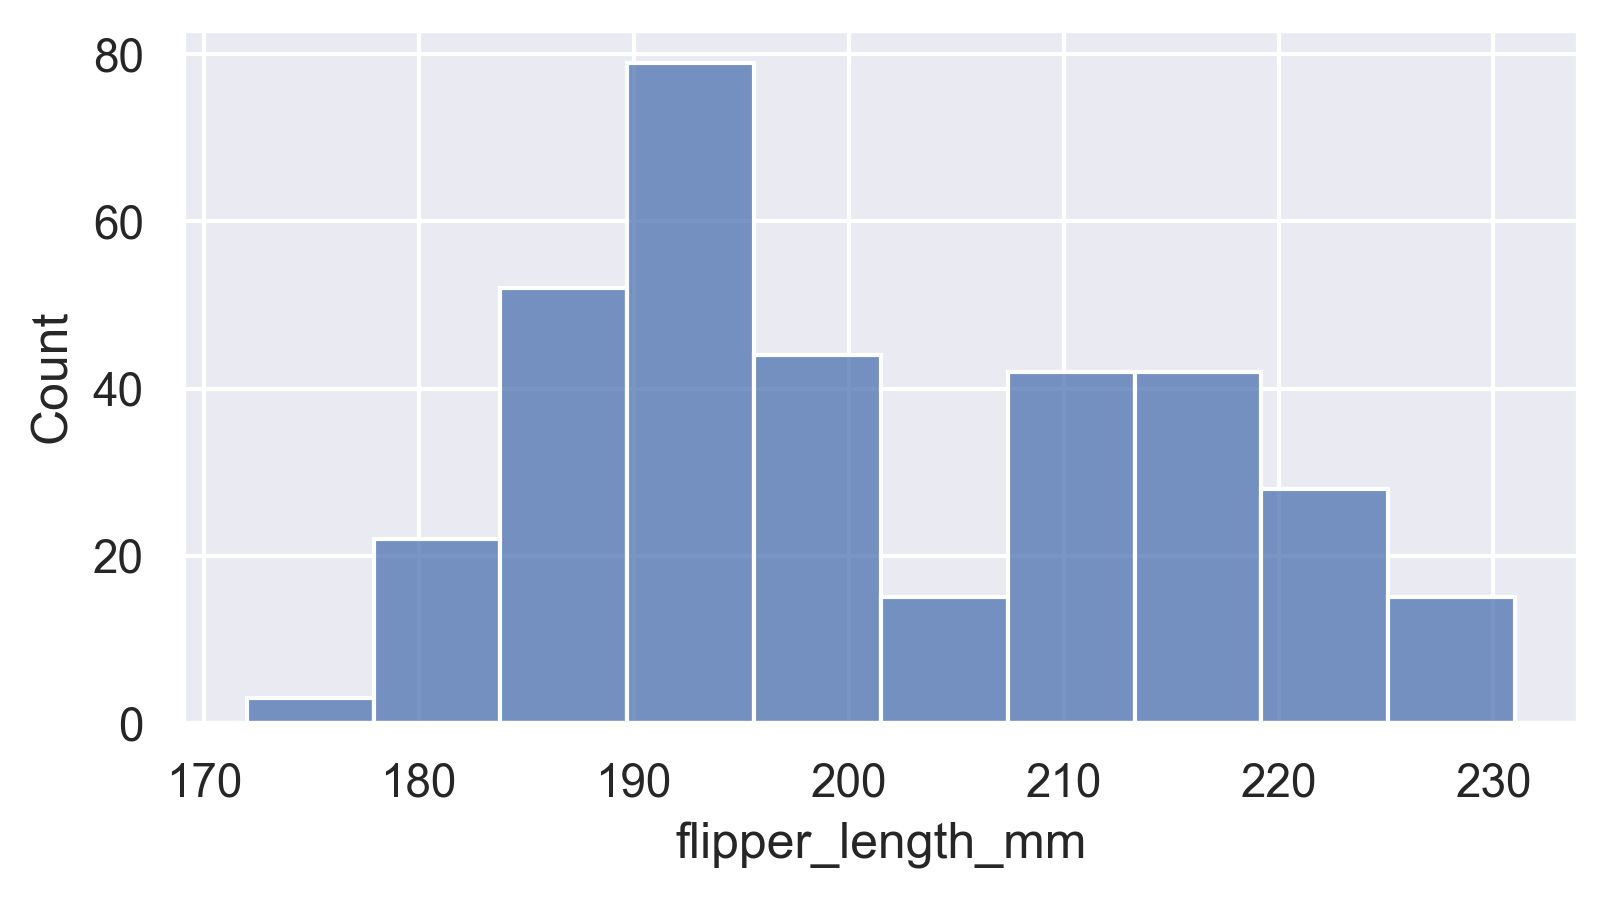

In [7]:
sns.histplot(x= "flipper_length_mm" , data=data)
#sns.set_theme(style='dark')

<Axes: xlabel='Count', ylabel='flipper_length_mm'>

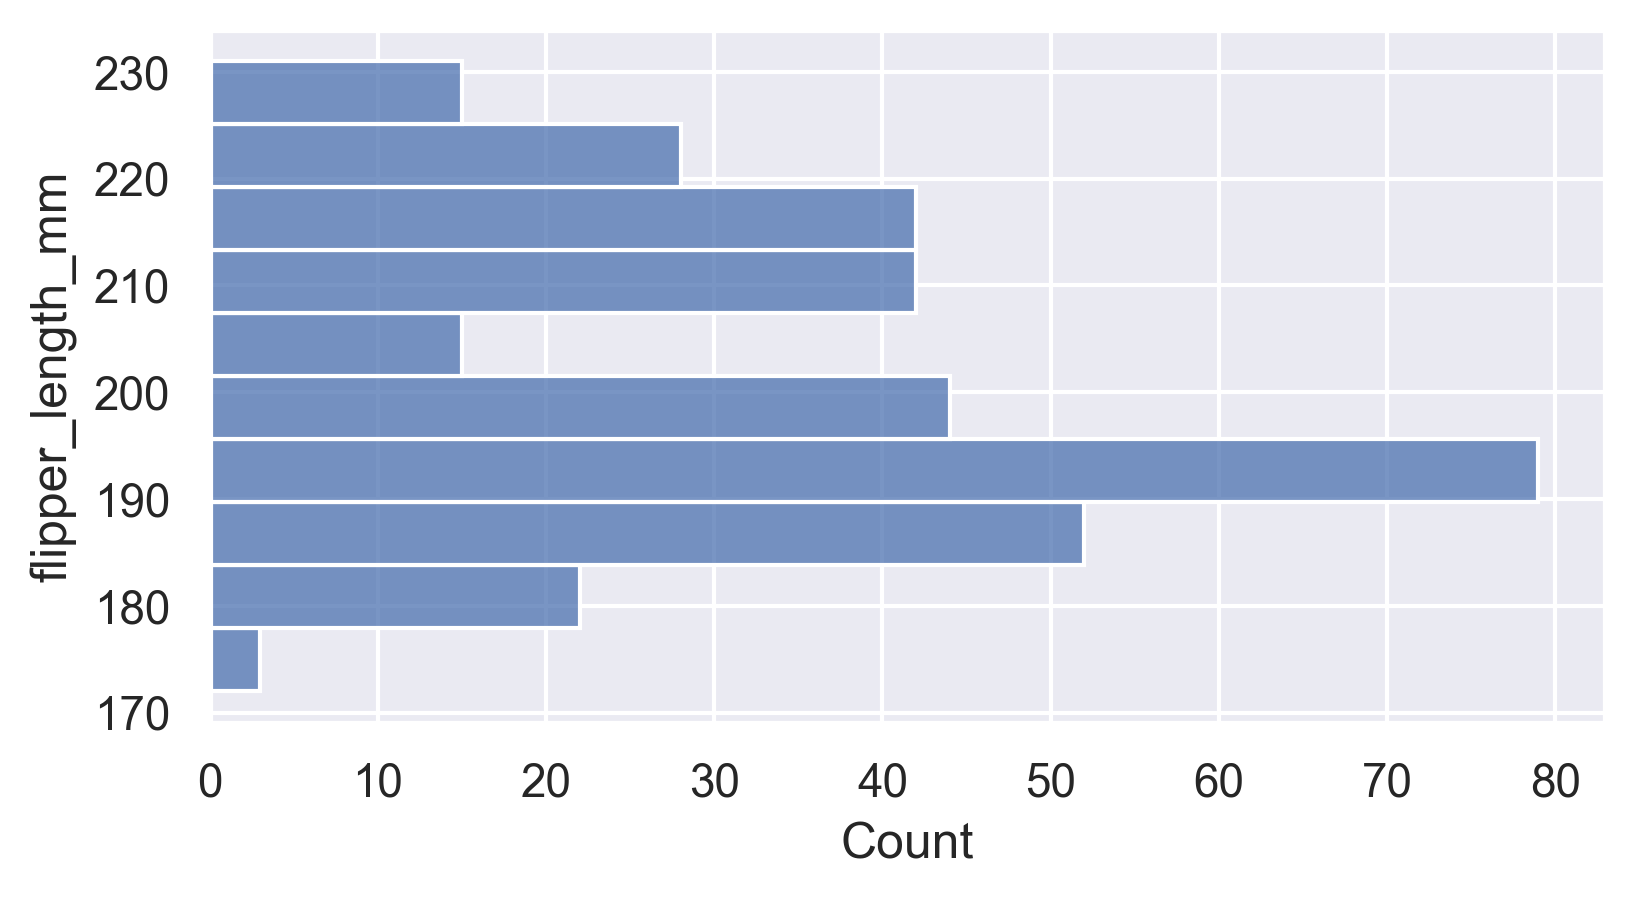

In [8]:
sns.histplot(y= "flipper_length_mm" , data=data)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

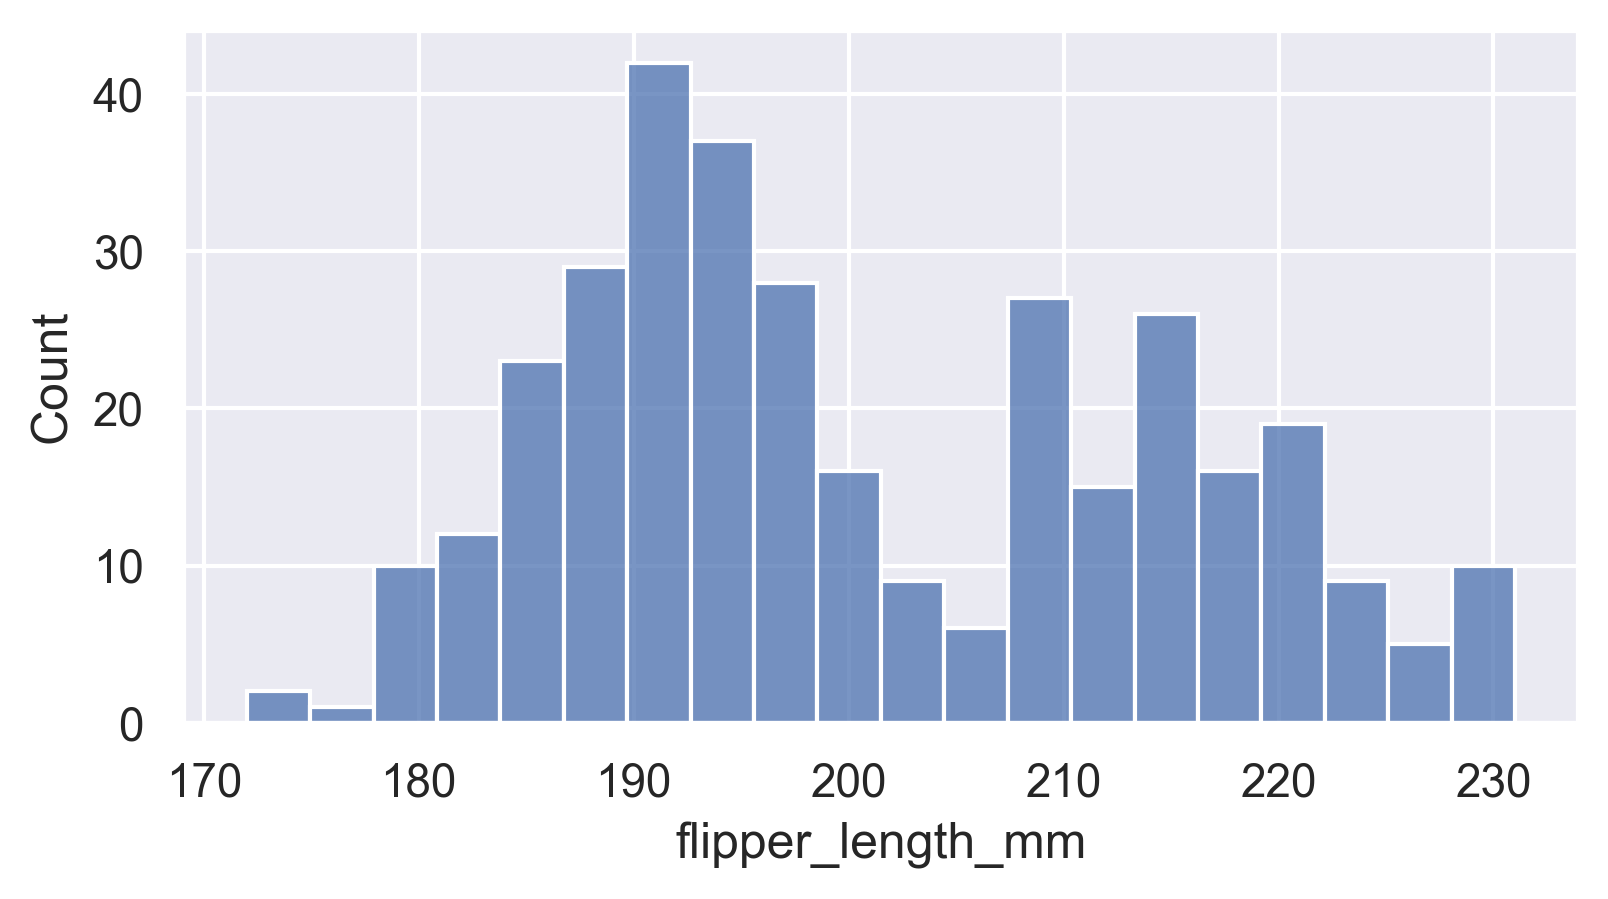

In [9]:
sns.histplot(x= "flipper_length_mm" , data=data,binwidth=3)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

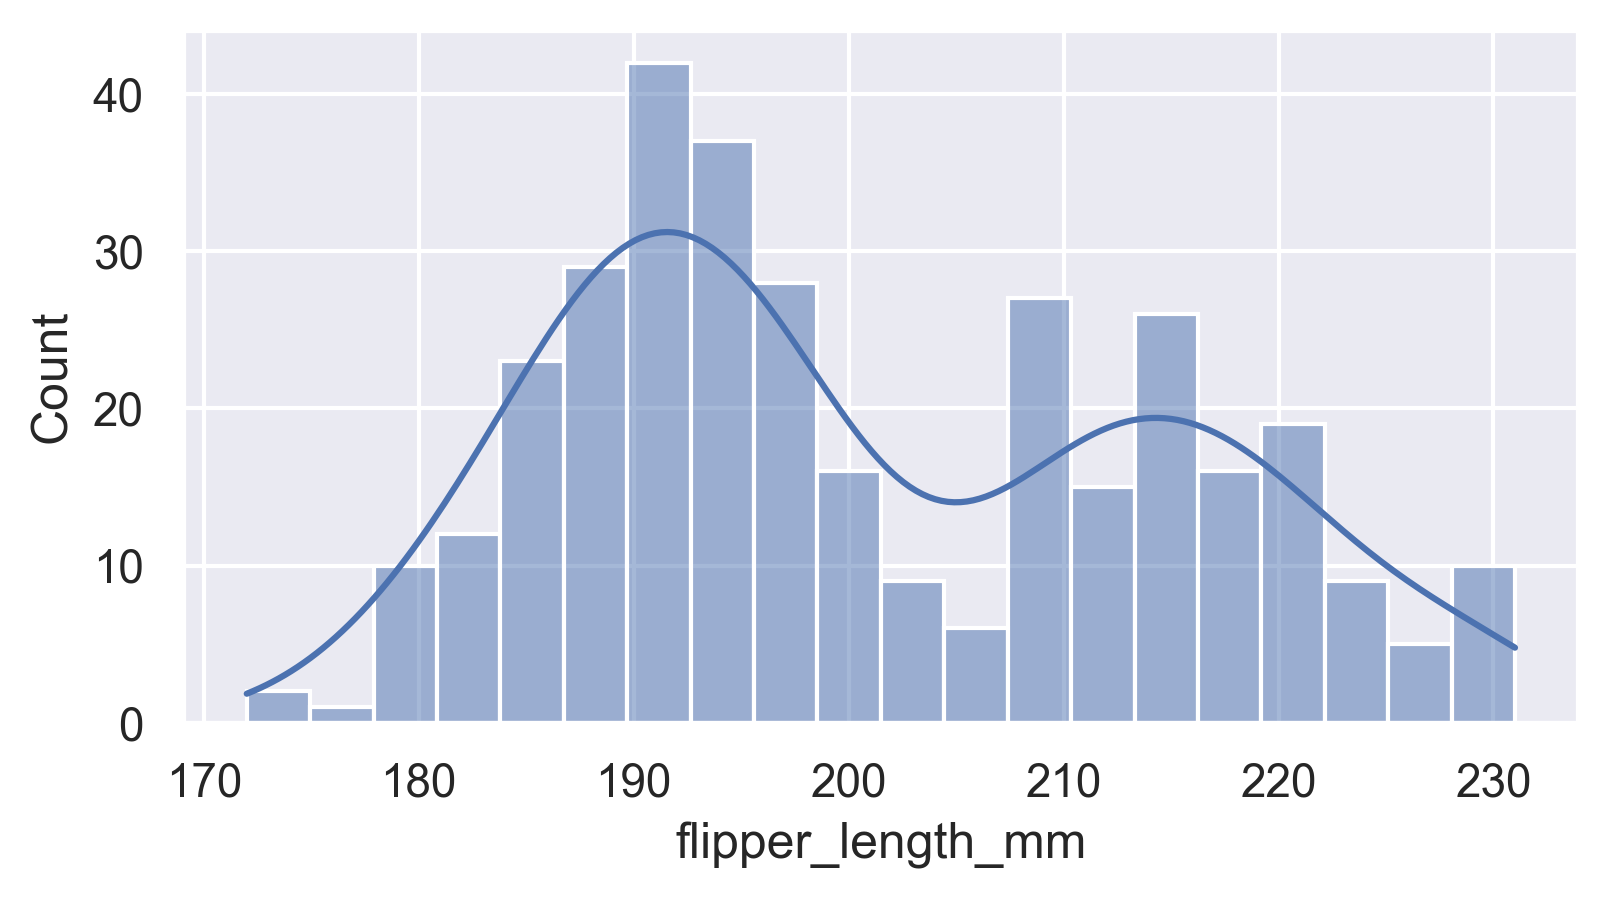

In [10]:
sns.histplot(x= "flipper_length_mm" , data=data,binwidth=3,kde=True)


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

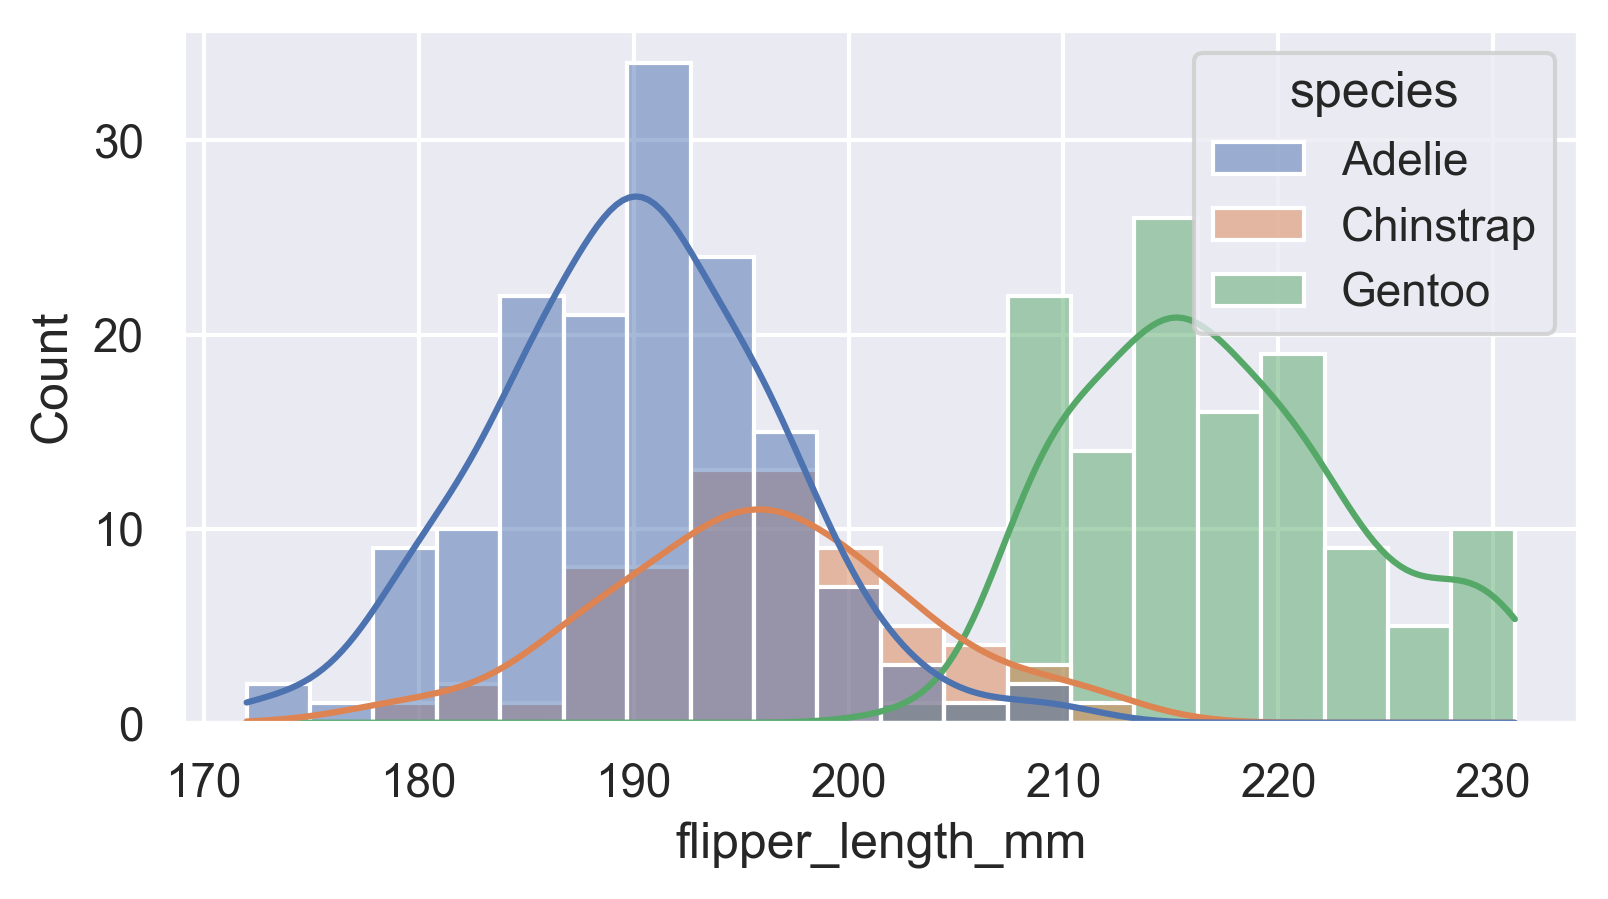

In [11]:
sns.histplot(x= "flipper_length_mm" , data=data,binwidth=3,kde=True,hue="species")


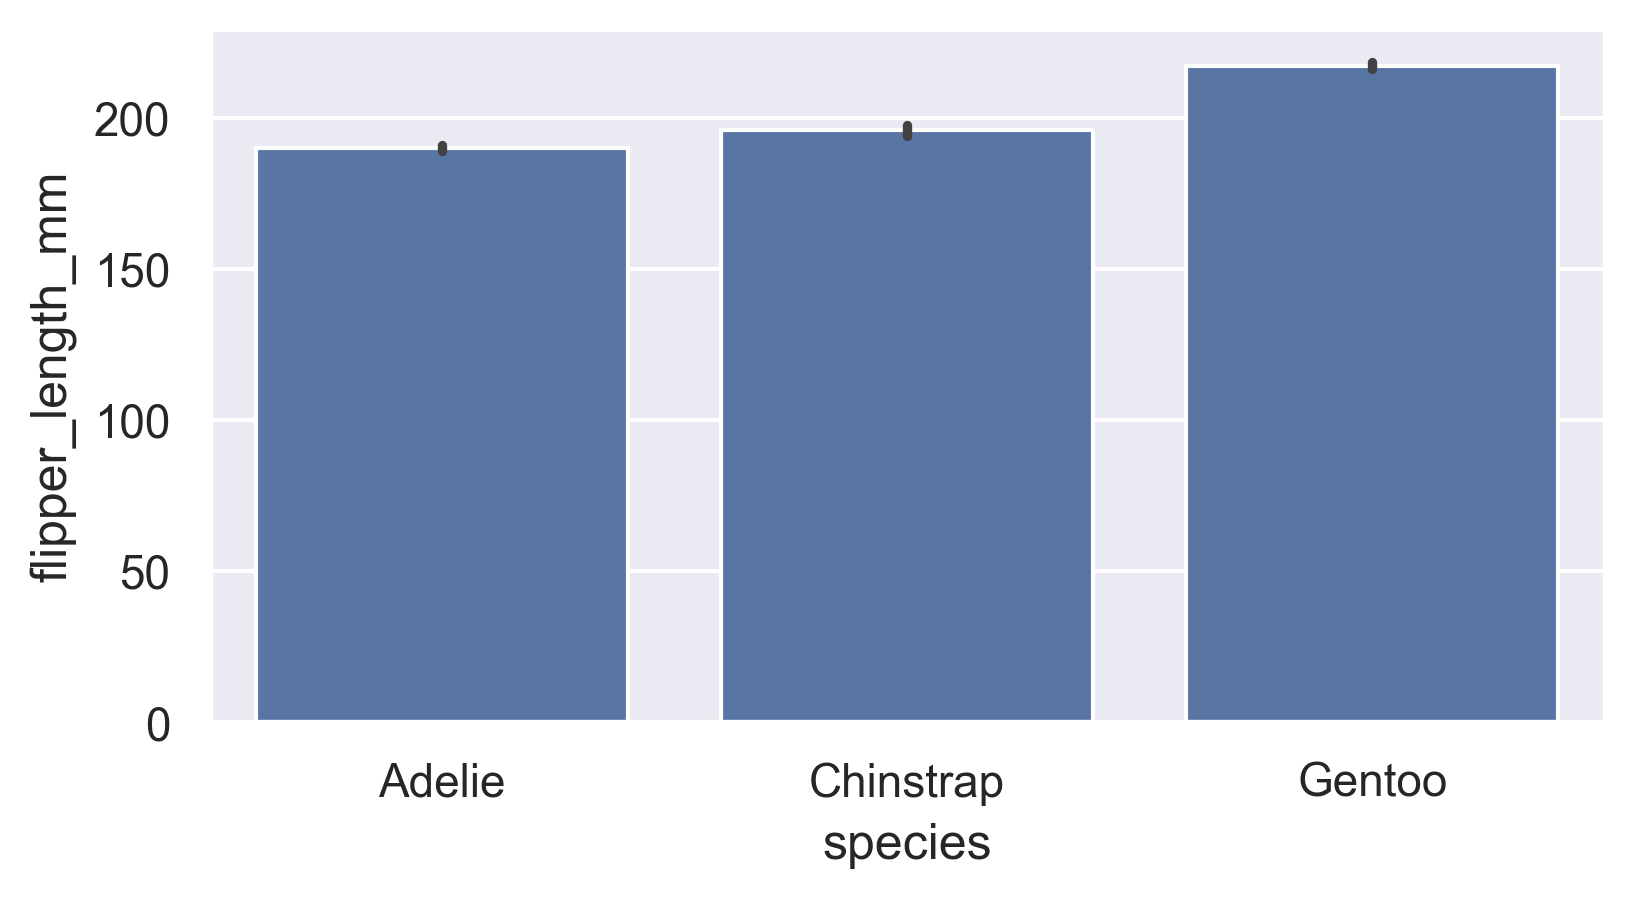

In [12]:
# Bar plot çizimi

bar = sns.barplot(x="species", y="flipper_length_mm", data=data)  


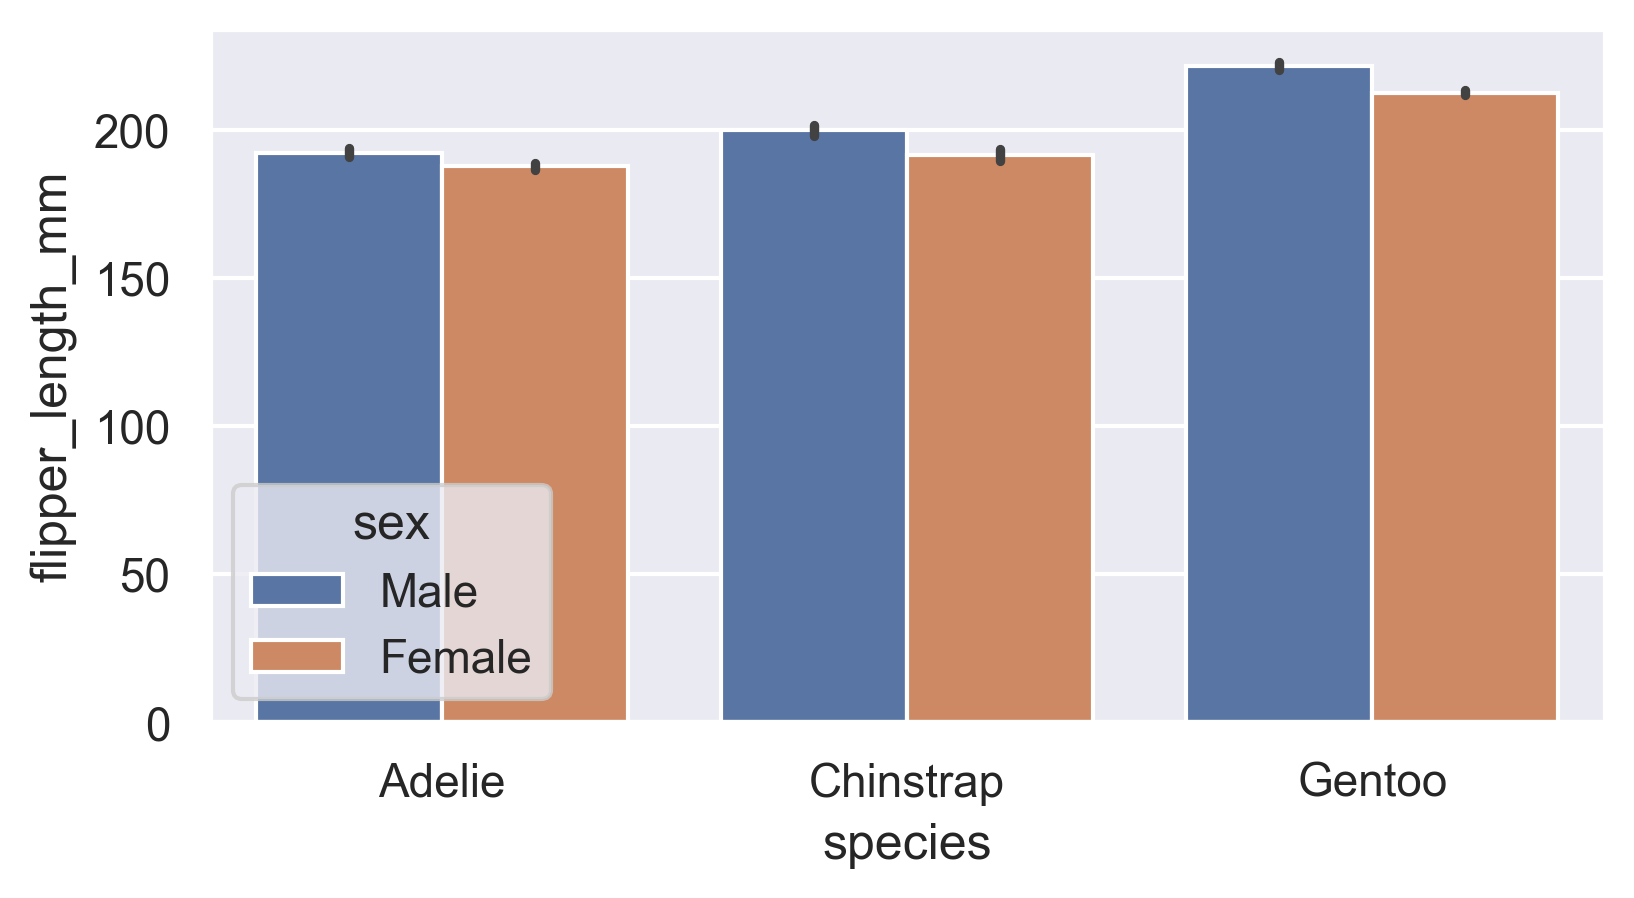

In [13]:
bar = sns.barplot(x="species", y="flipper_length_mm", data=data,hue="sex")  


/var/folders/26/pvvz5dxx7lb978b1_d113_r40000gn/T/ipykernel_4401/2703889908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x="species", y="flipper_length_mm", data=data, palette="Set3")  # Kutu plot


Text(0.5, 1.0, 'Flipper Length by Species')

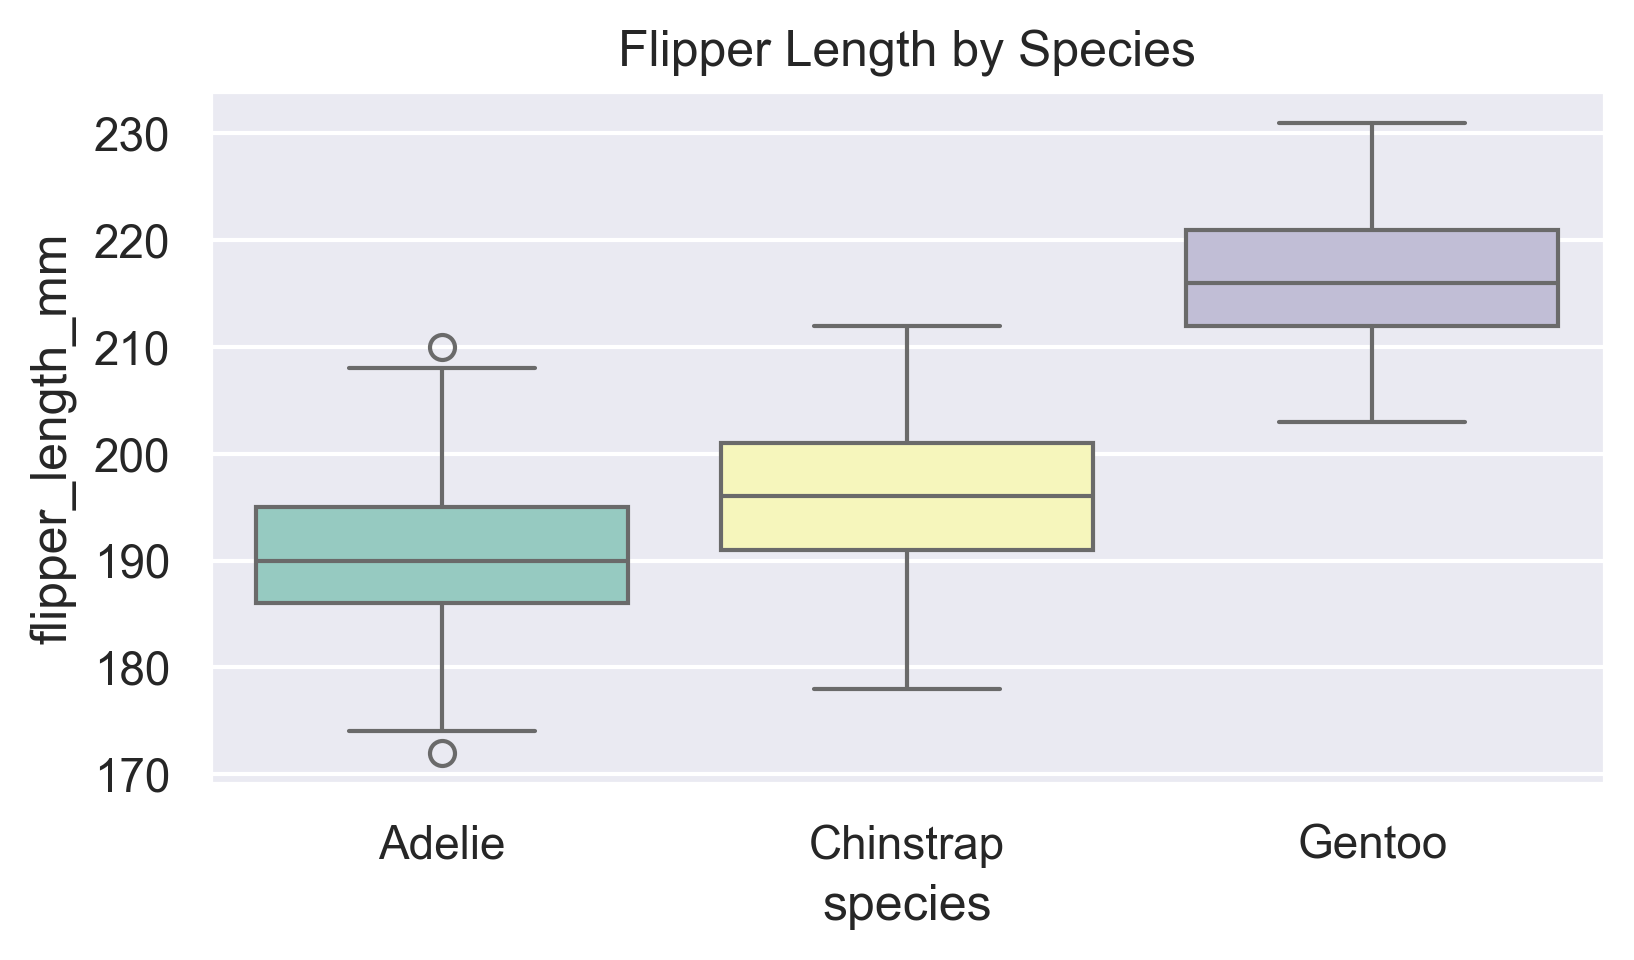

In [14]:
box = sns.boxplot(x="species", y="flipper_length_mm", data=data, palette="Set3")  # Kutu plot
box.set_title("Flipper Length by Species")  # Grafik başlığı

Text(0.5, 1.0, 'Flipper Length by Species')

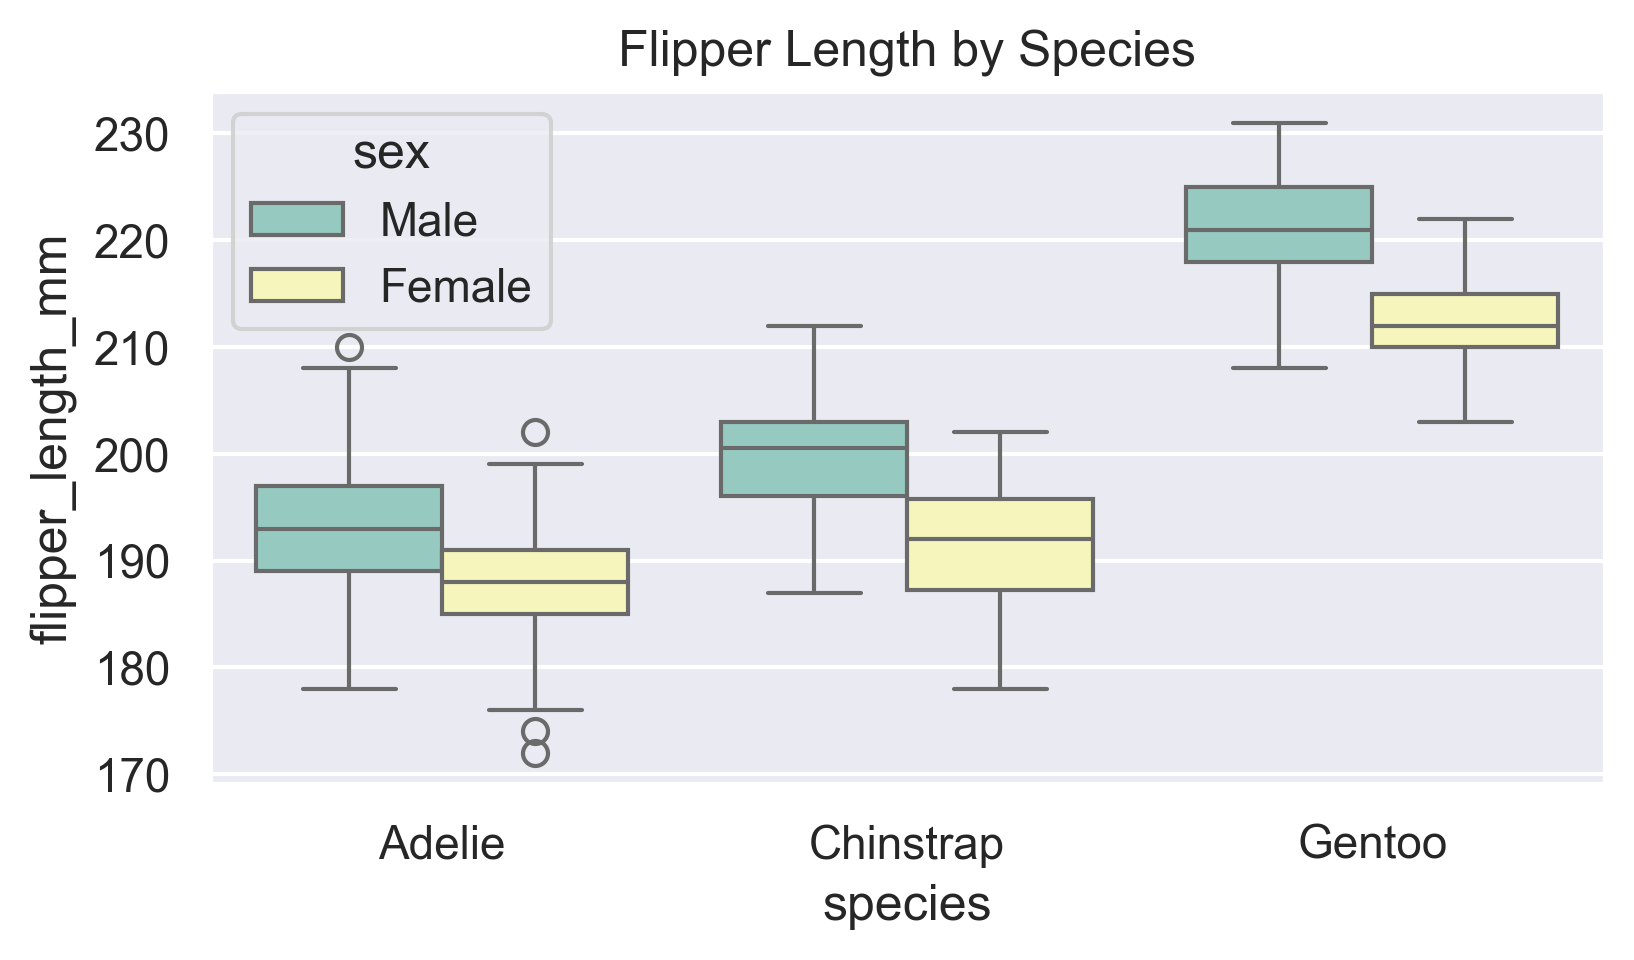

In [15]:
box = sns.boxplot(x="species", y="flipper_length_mm", data=data, palette="Set3",hue="sex")  # Kutu plot
box.set_title("Flipper Length by Species")  # Grafik başlığı

<Axes: xlabel='species', ylabel='flipper_length_mm'>

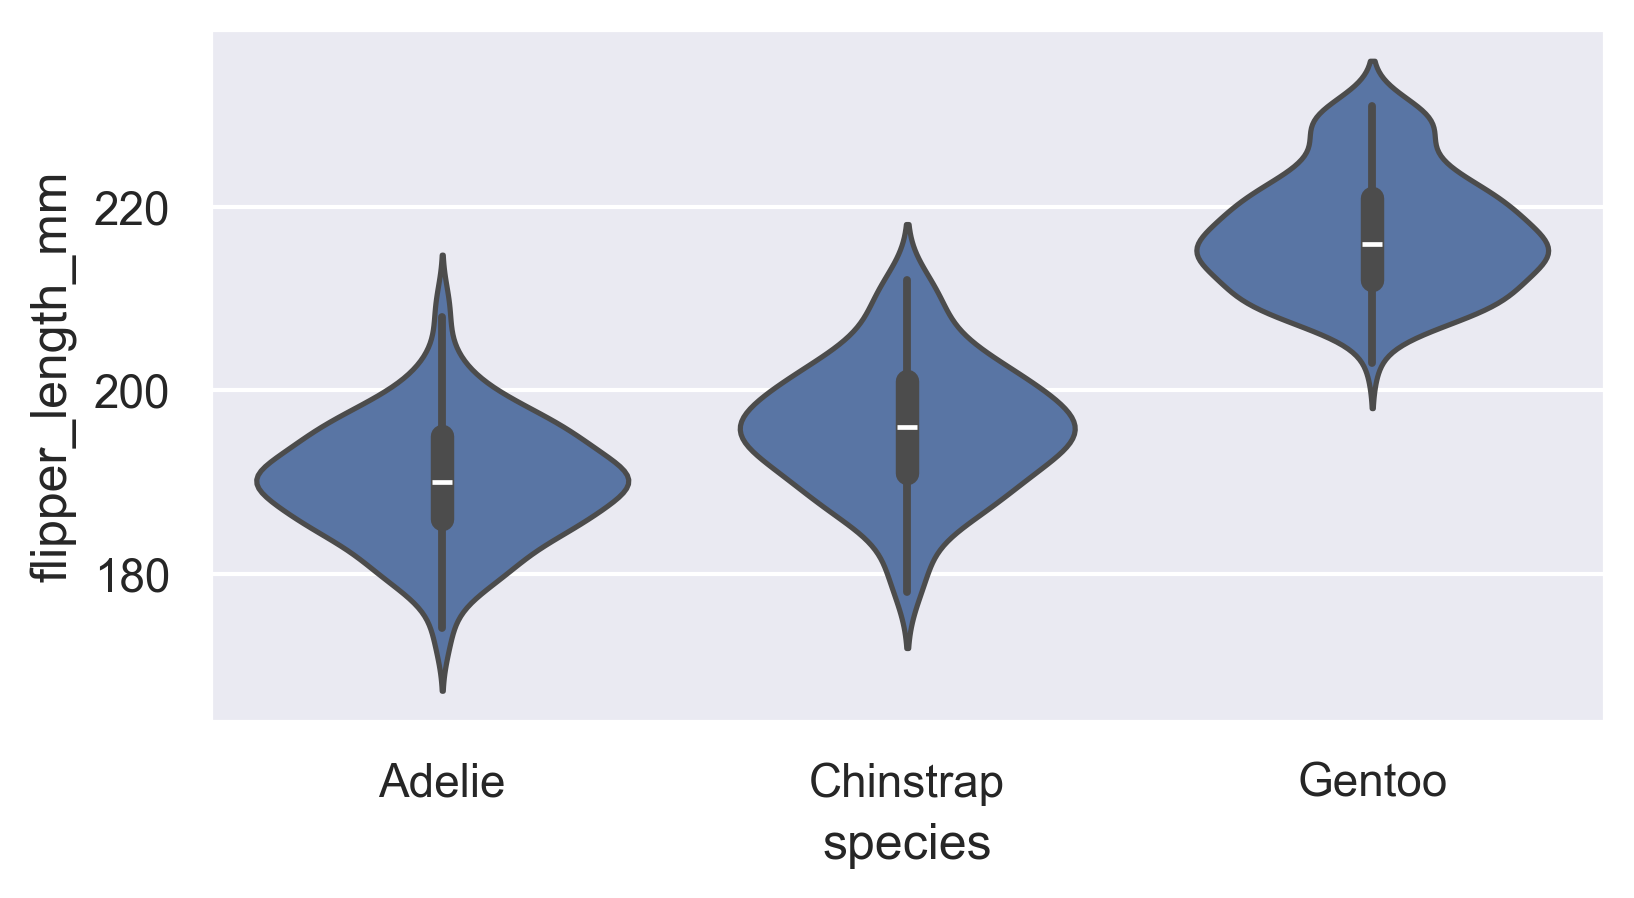

In [16]:
sns.violinplot(x="species",y="flipper_length_mm",data=data)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

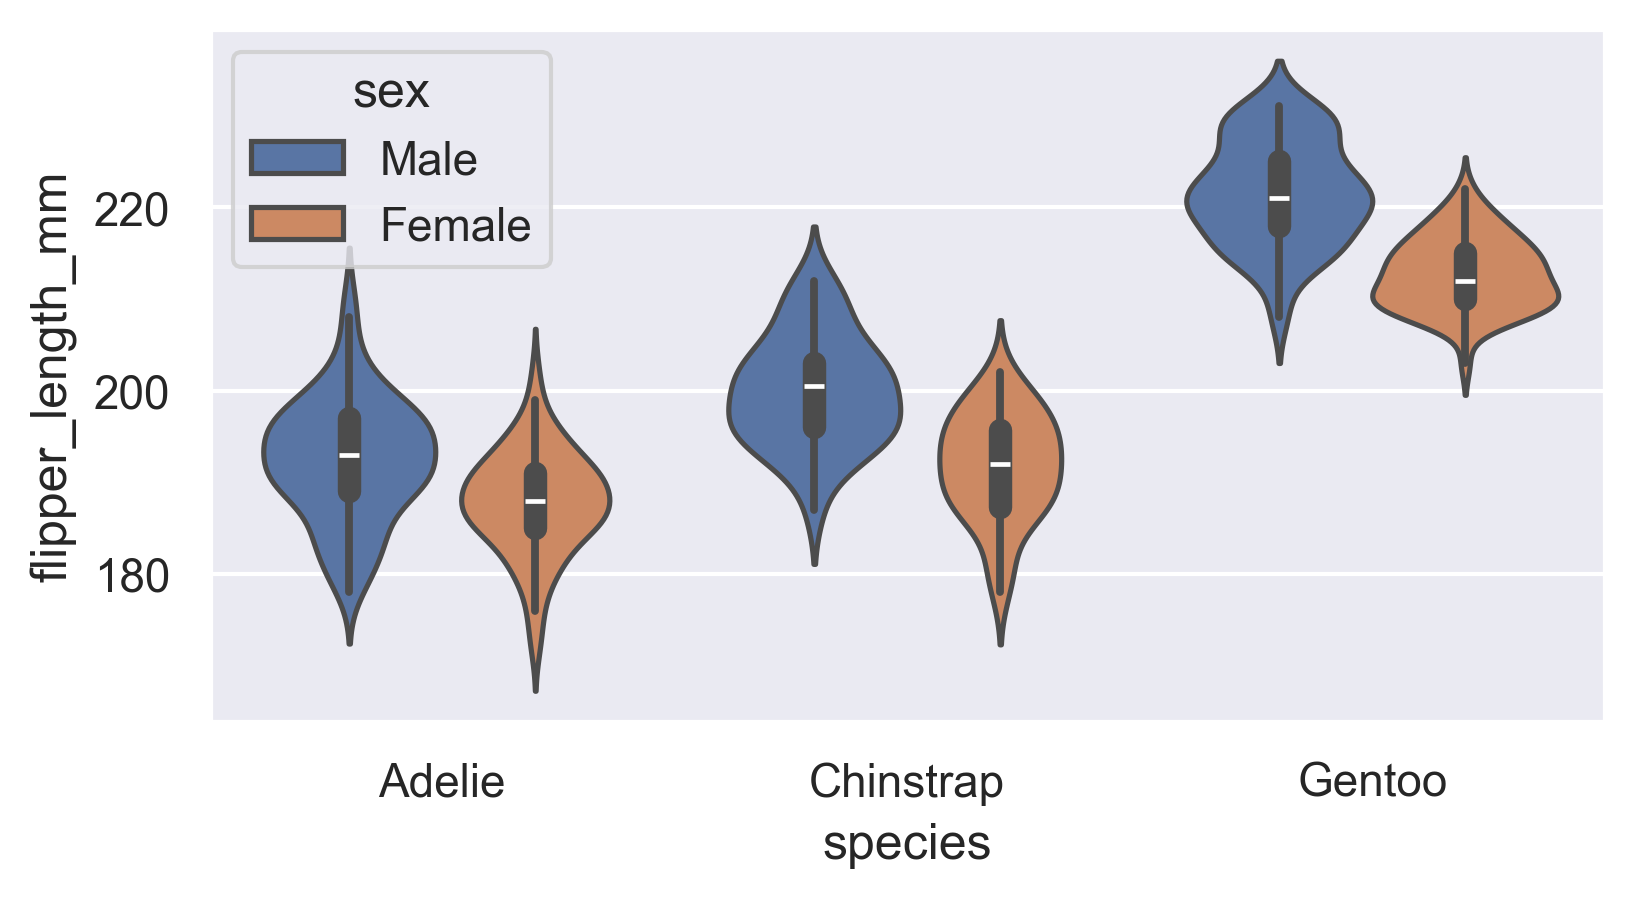

In [17]:
sns.violinplot(x="species",y="flipper_length_mm",data=data,hue="sex")

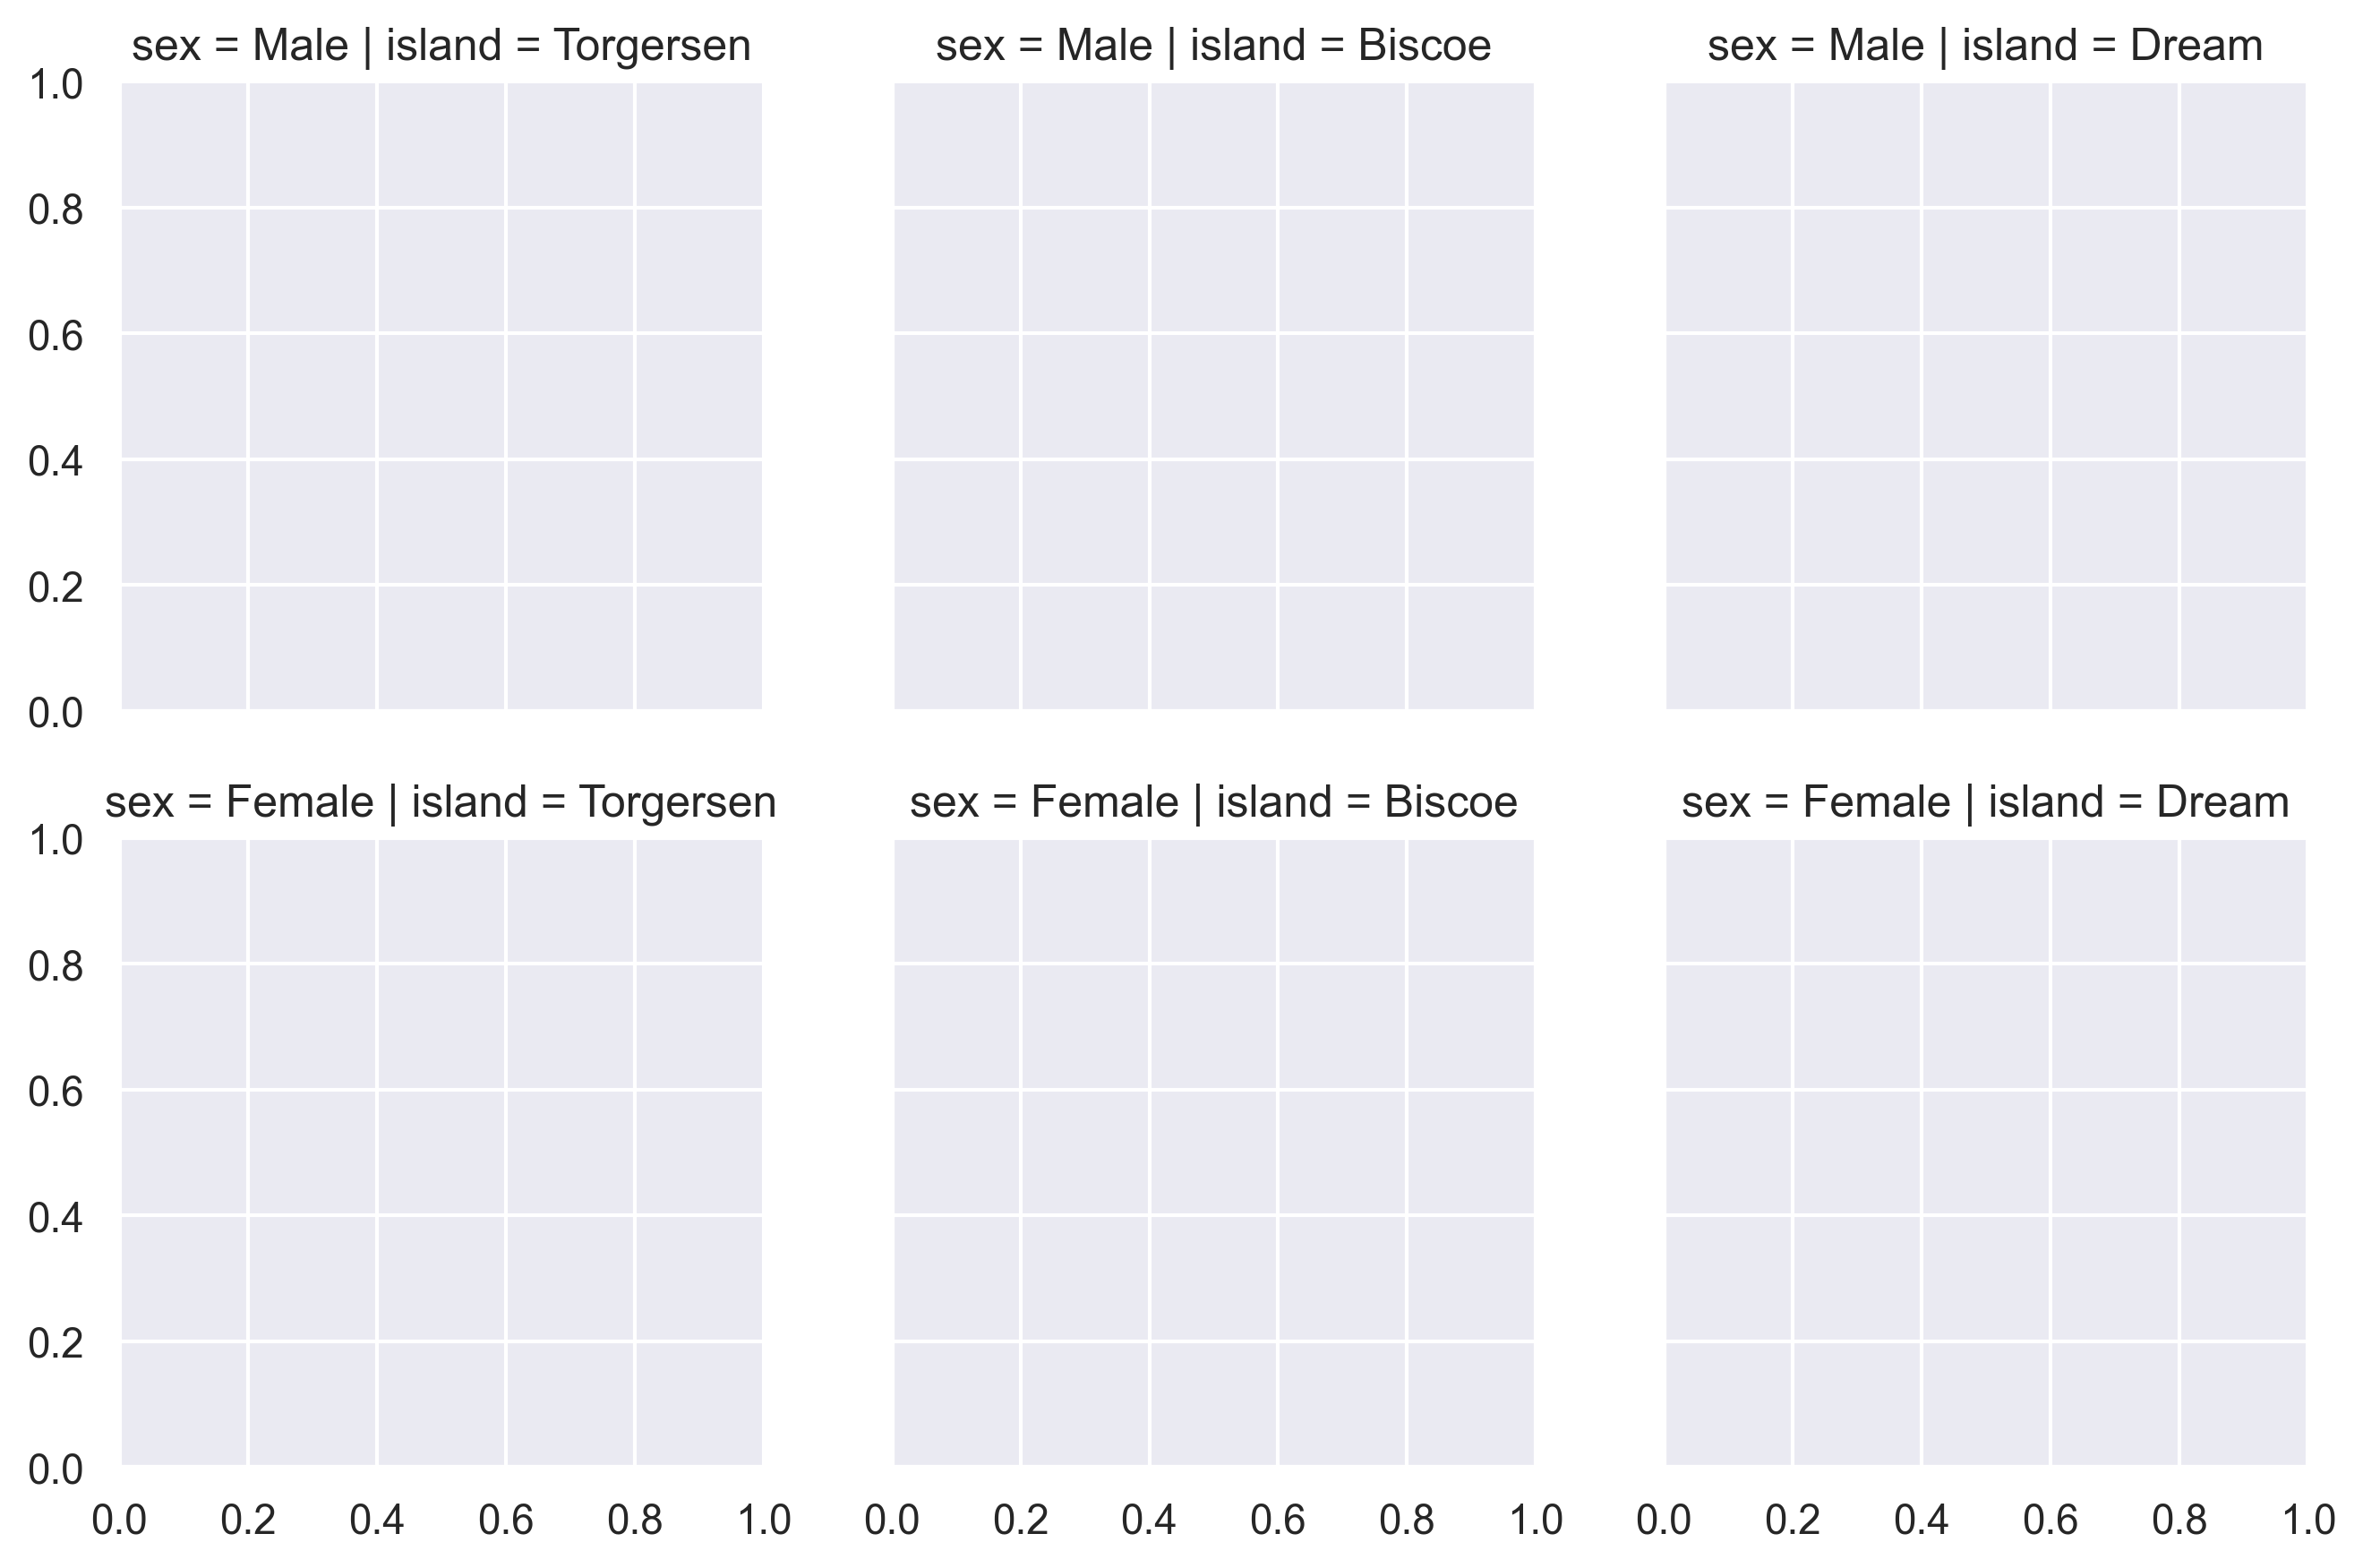

In [18]:
sns.FacetGrid(data,col="island",row="sex")

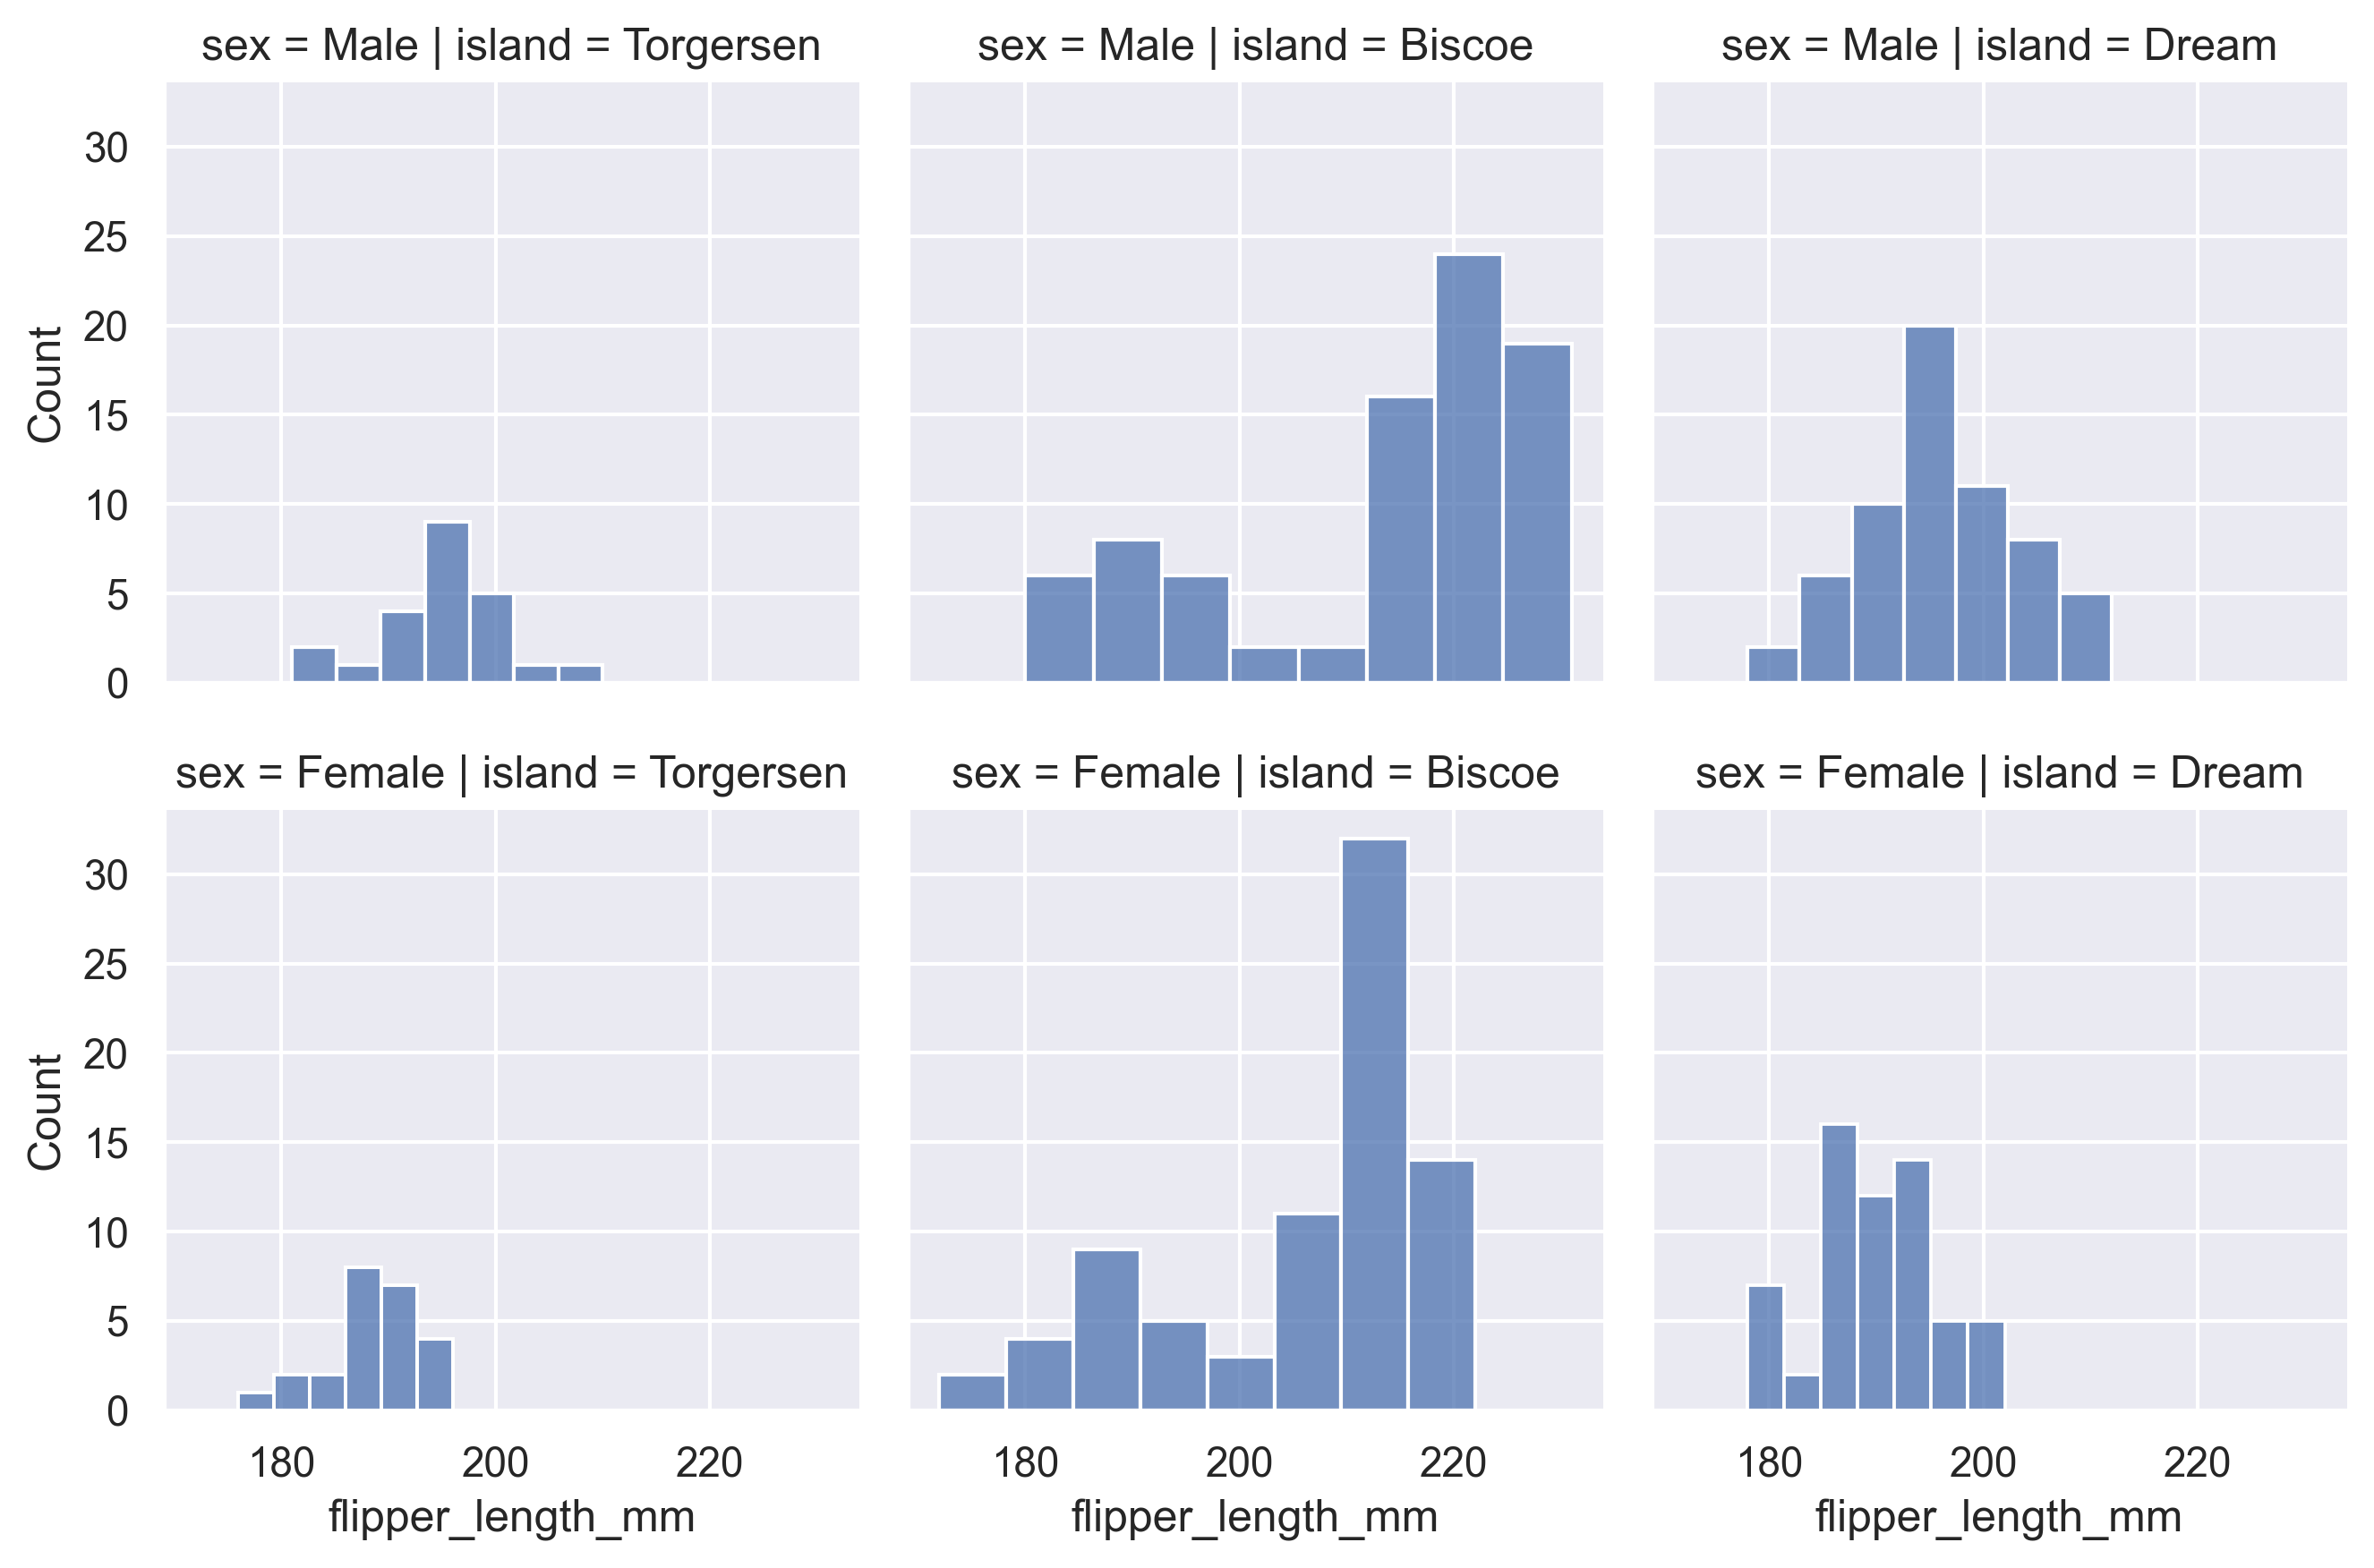

In [19]:
sns.FacetGrid(data,col="island",row="sex").map(sns.histplot,"flipper_length_mm")


/Users/onurgumus/Desktop/Python ile Projeler/seaborn/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/onurgumus/Desktop/Python ile Projeler/seaborn/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

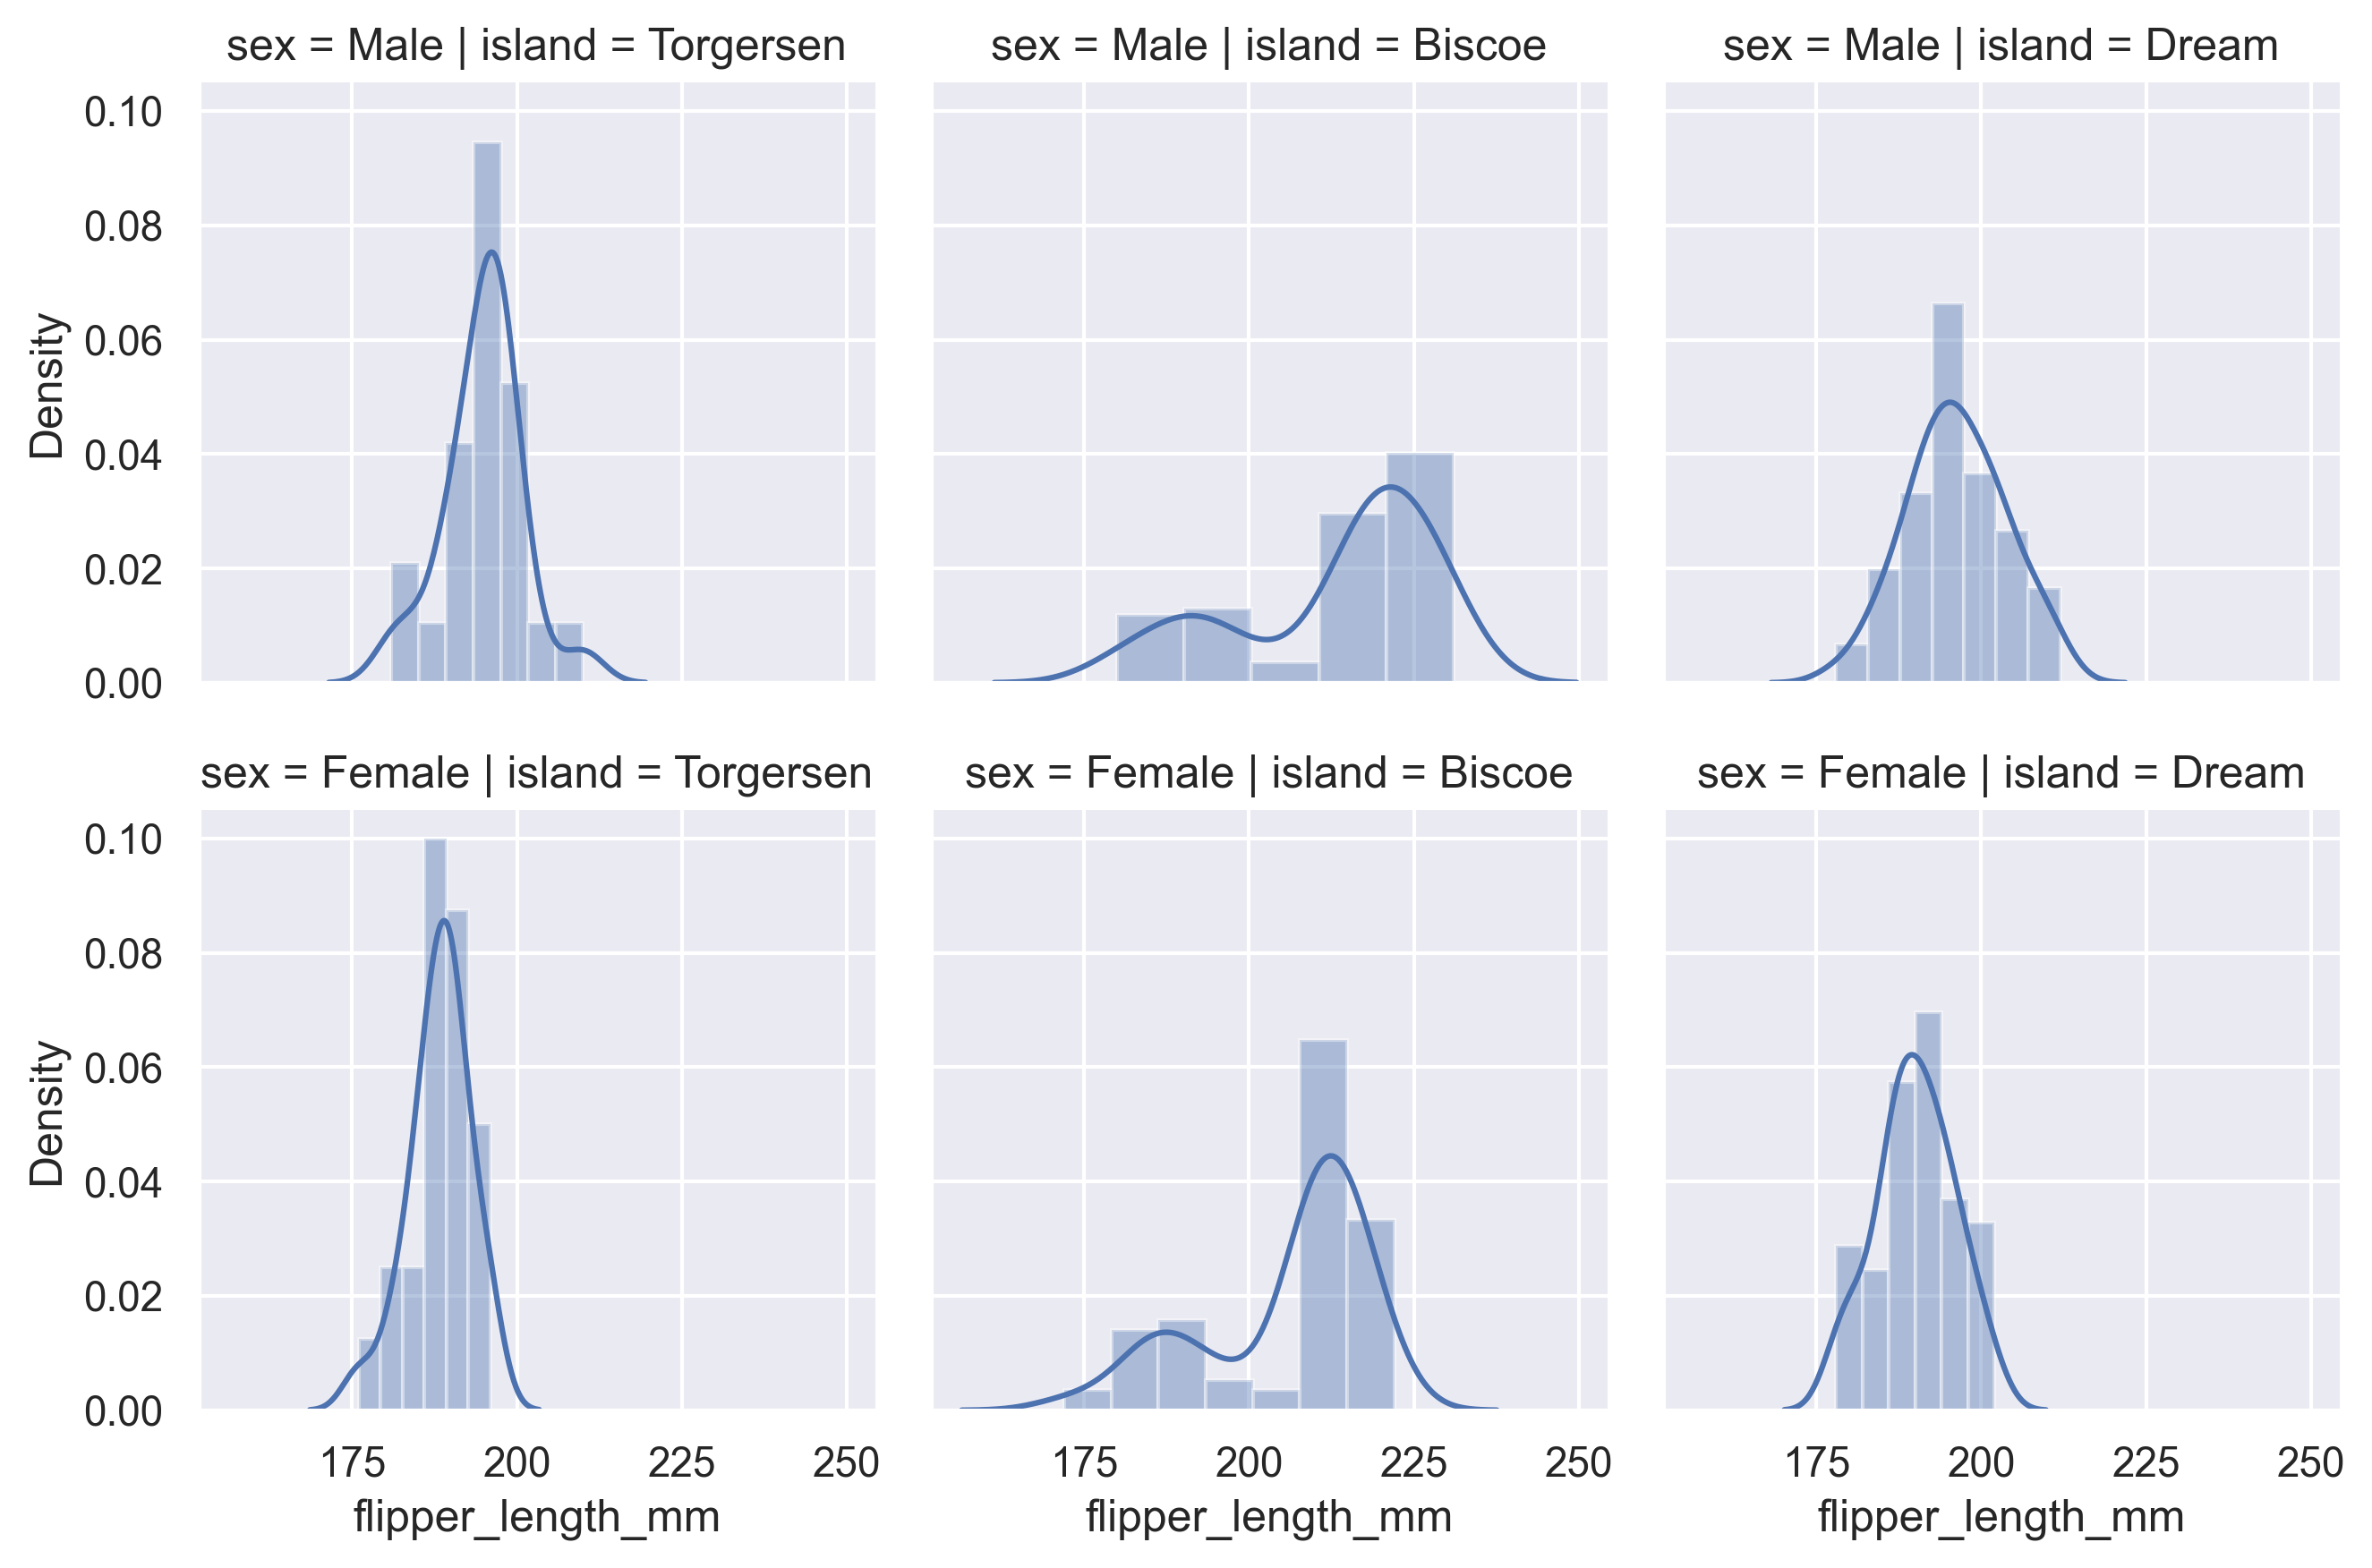

In [20]:
sns.FacetGrid(data,col="island",row="sex").map(sns.distplot, "flipper_length_mm")

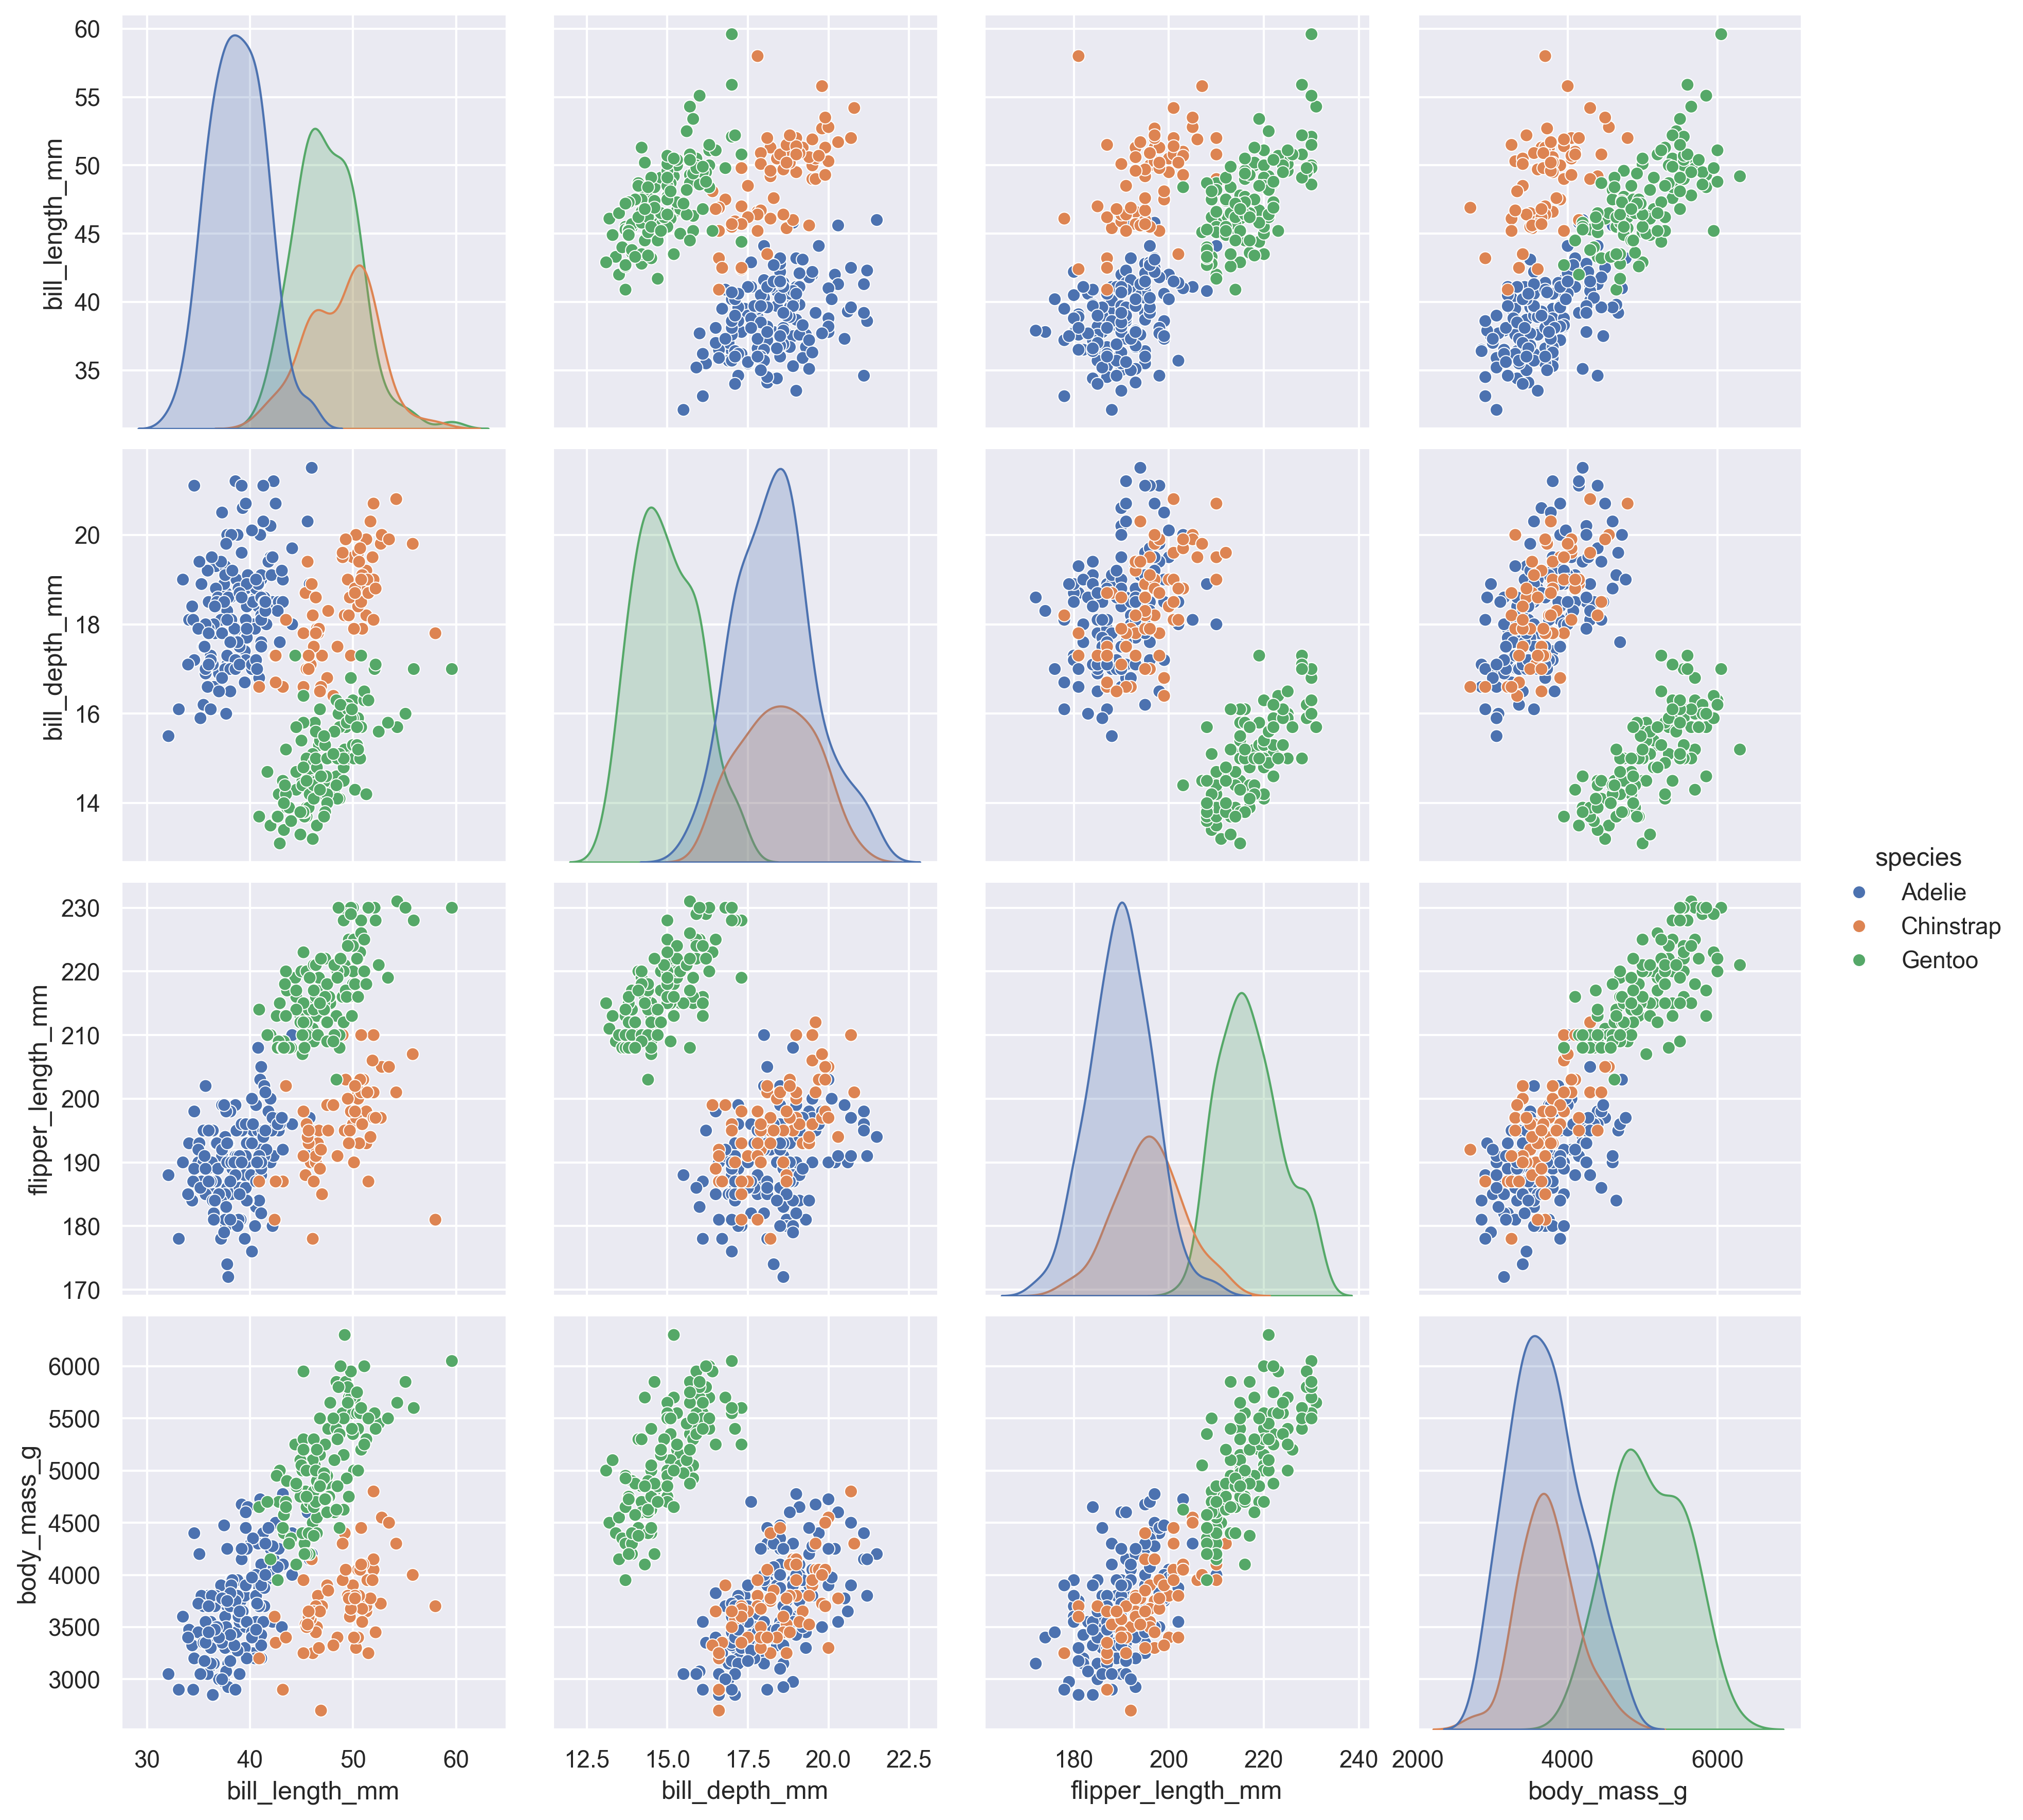

In [21]:
sns.pairplot(data,hue="species",height=3)

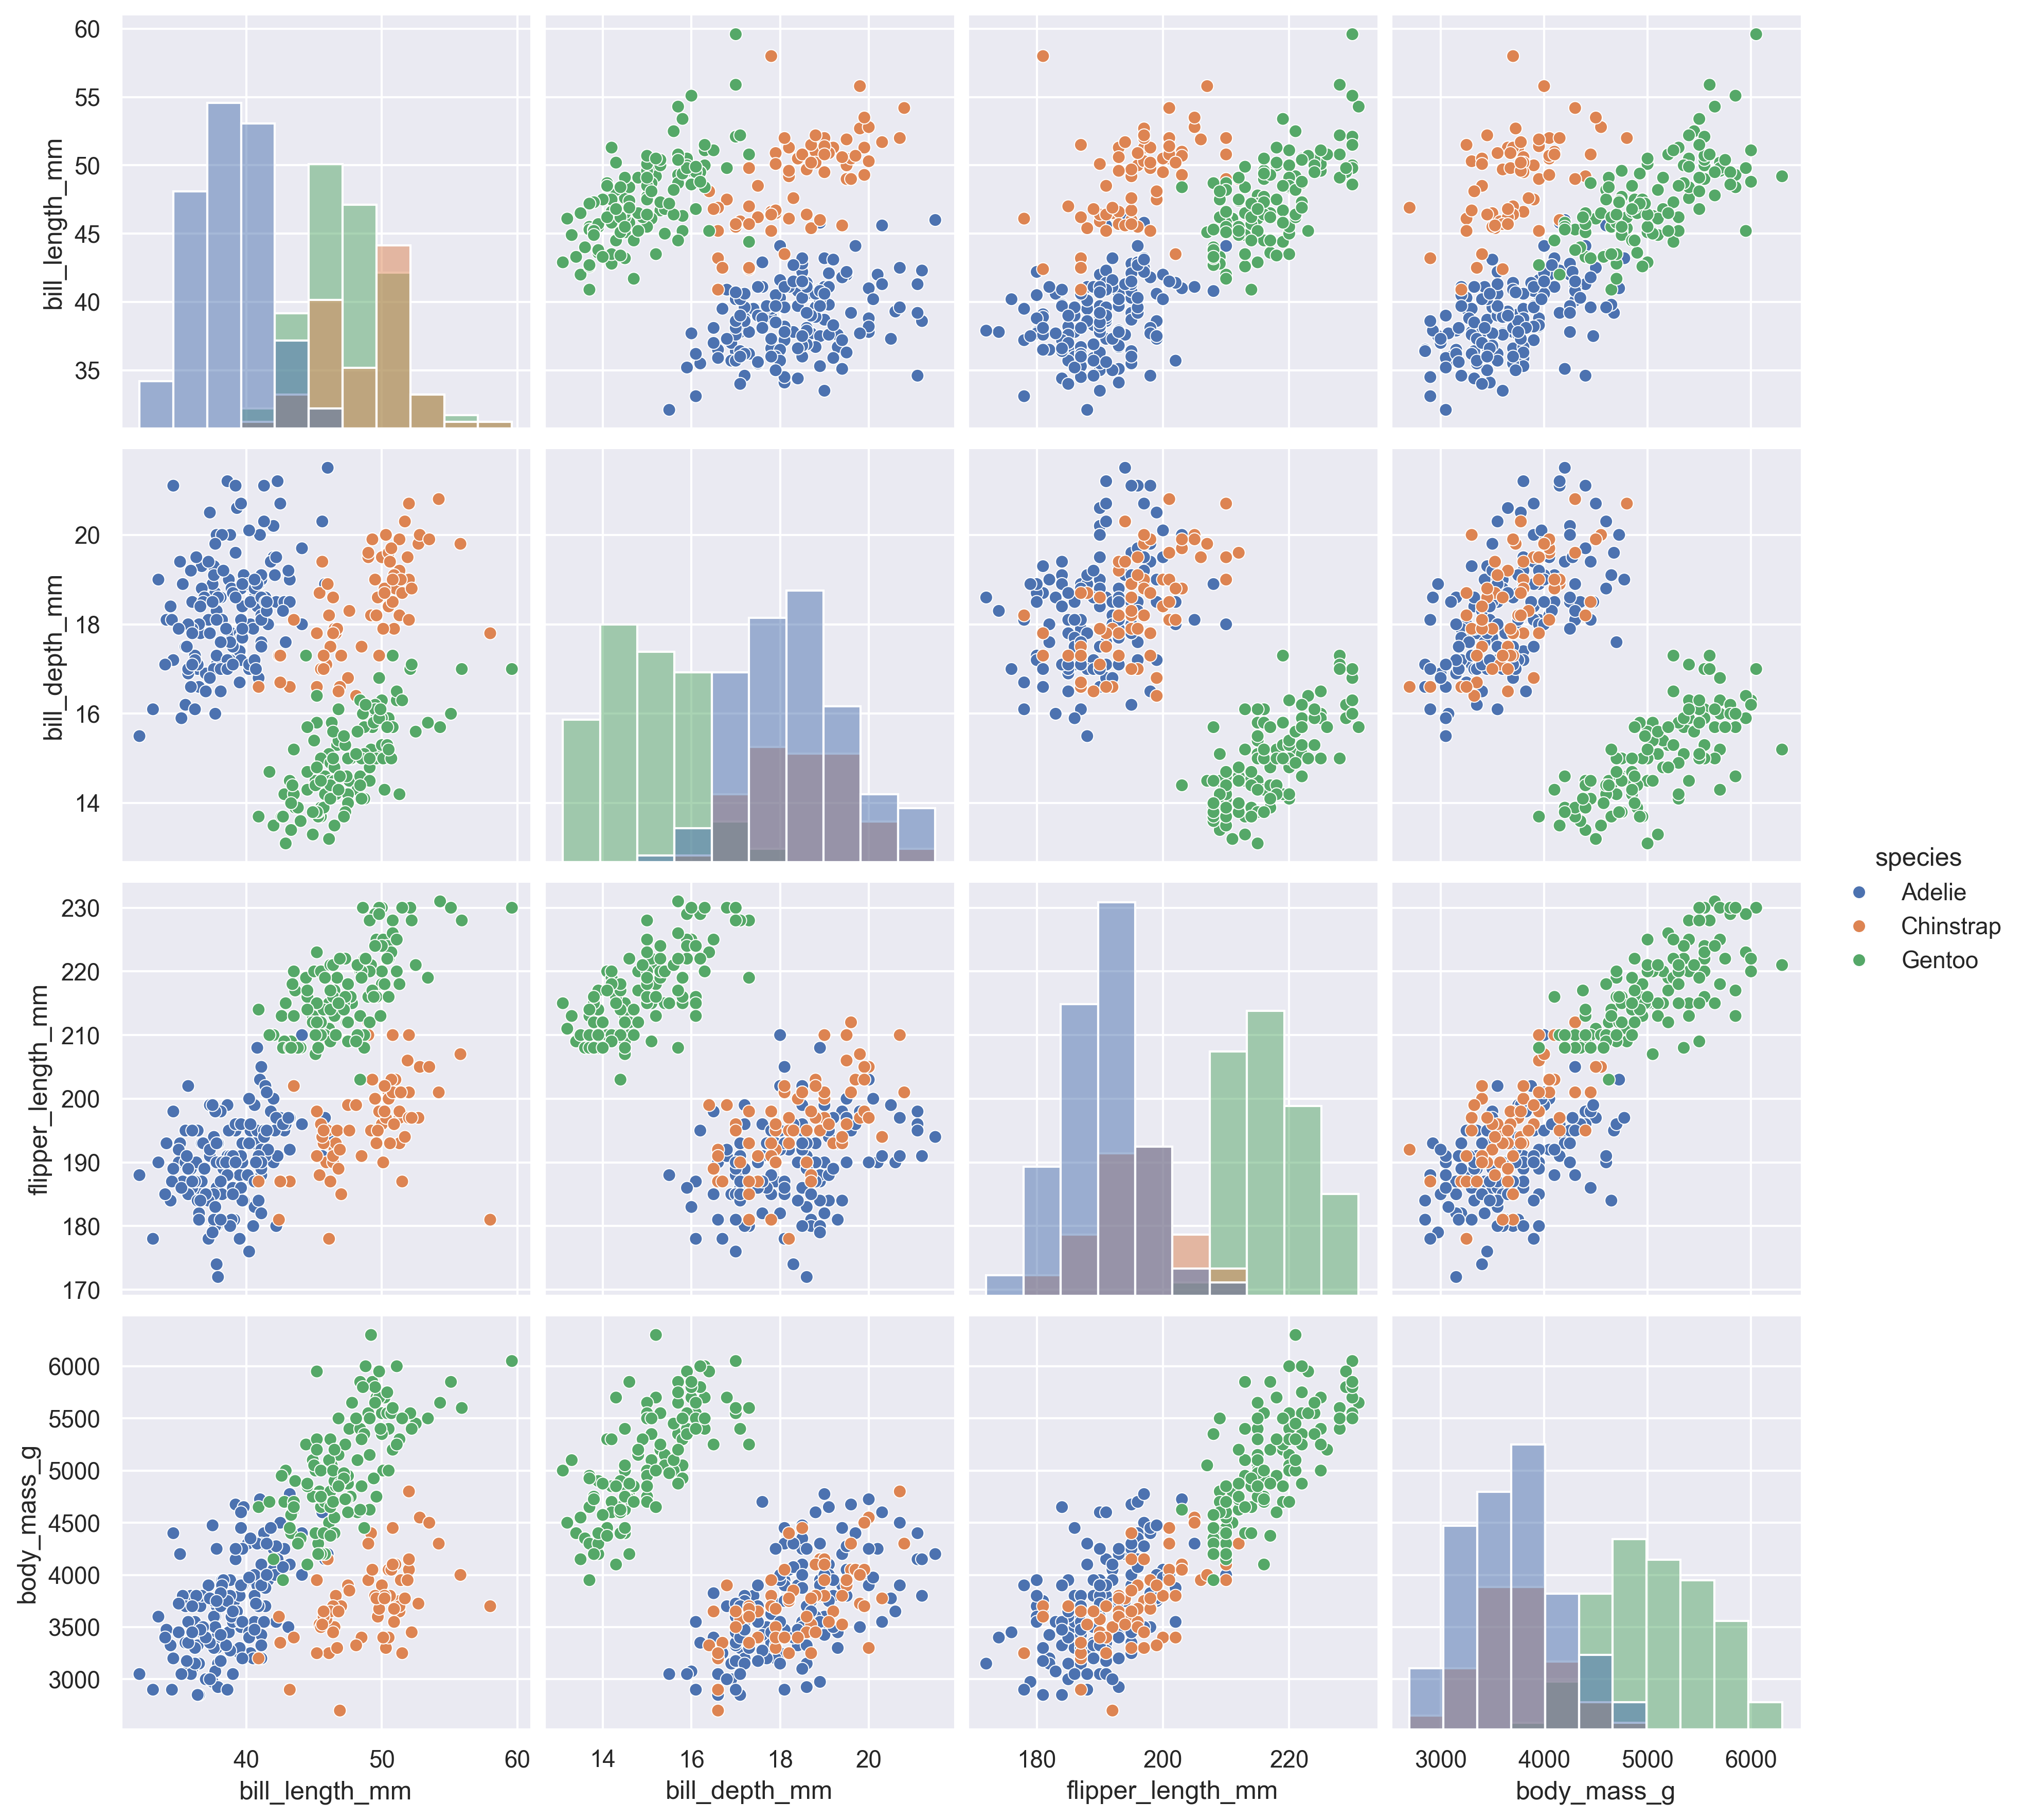

In [22]:
sns.pairplot(data,hue="species",height=3,diag_kind="hist")

<Axes: >

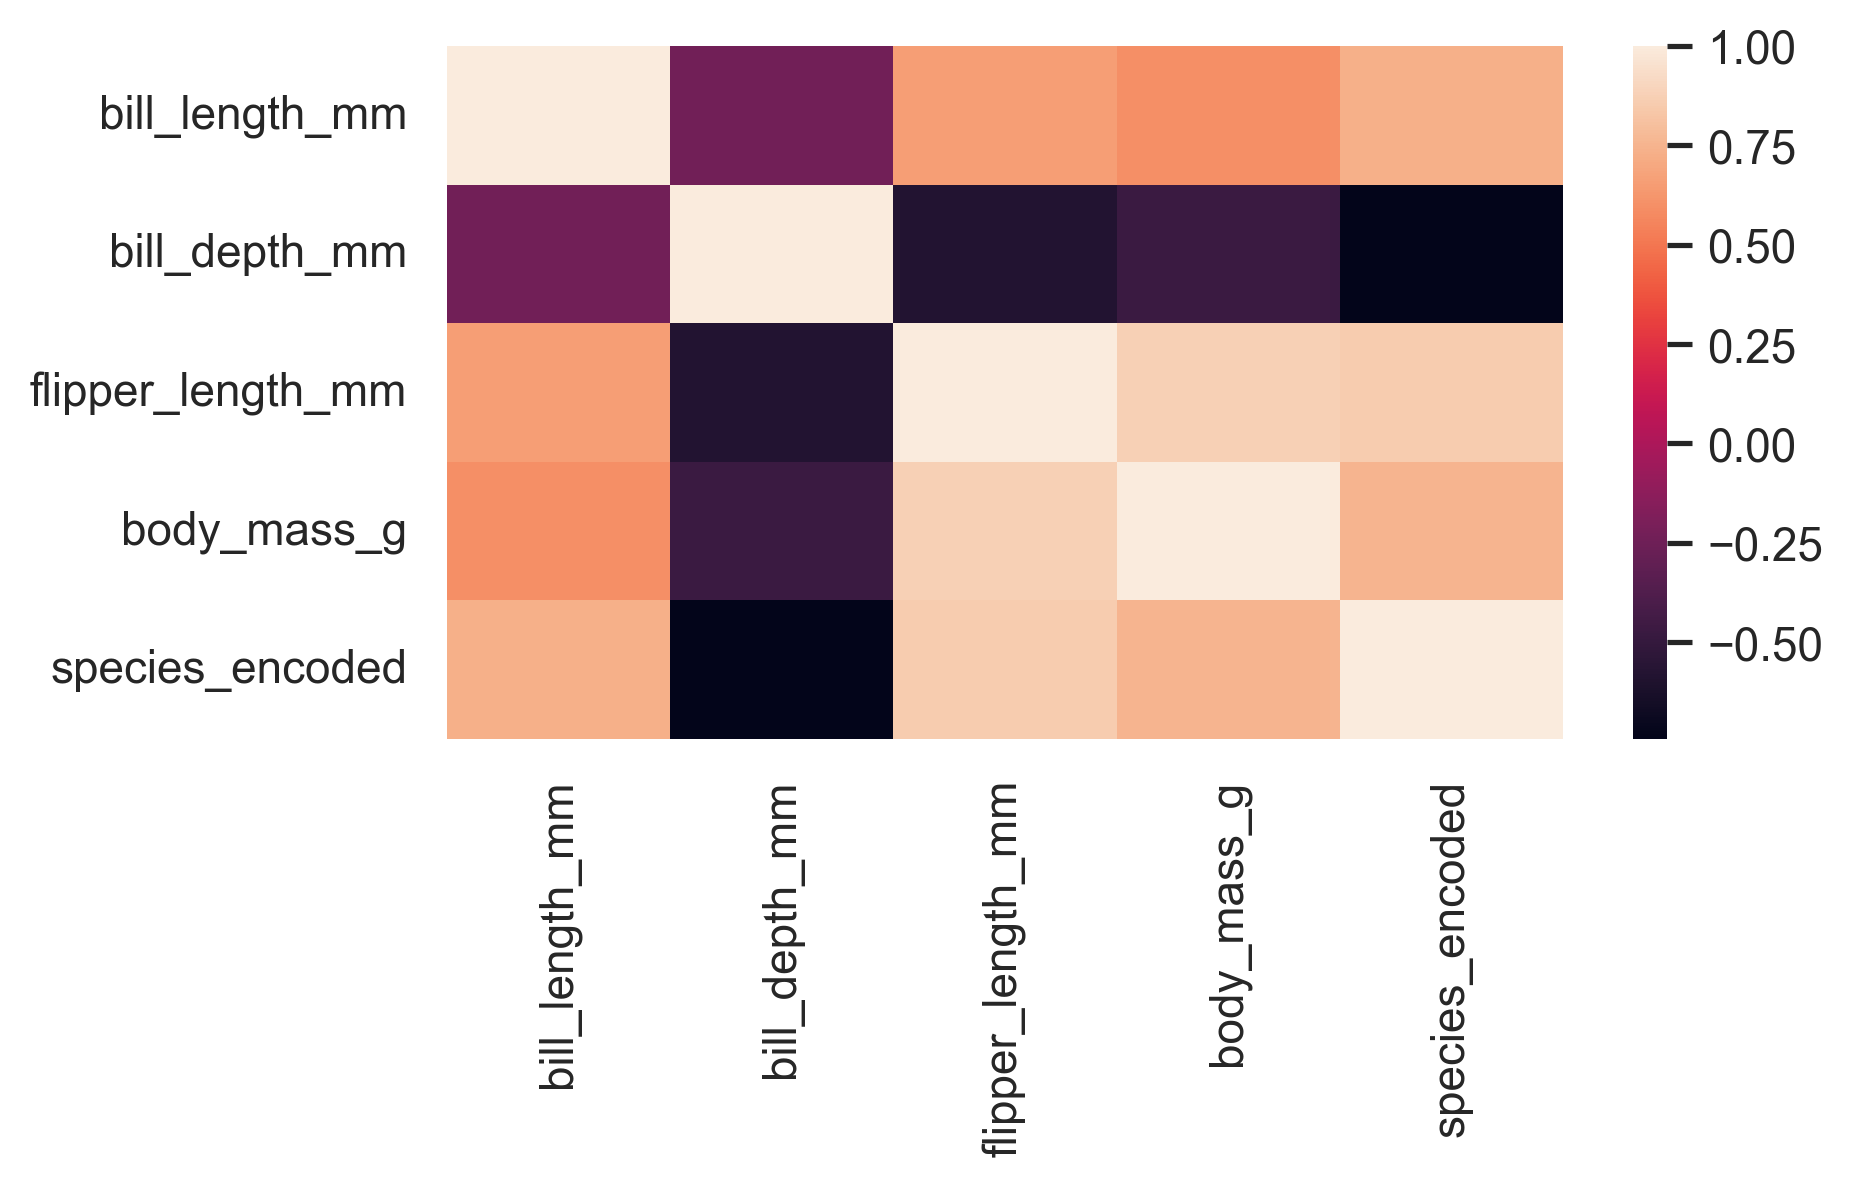

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["species_encoded"] = label_encoder.fit_transform(data["species"])

# Select numeric columns only for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create heatmap of correlations using numeric data
sns.heatmap(numeric_data.corr())


<Axes: >

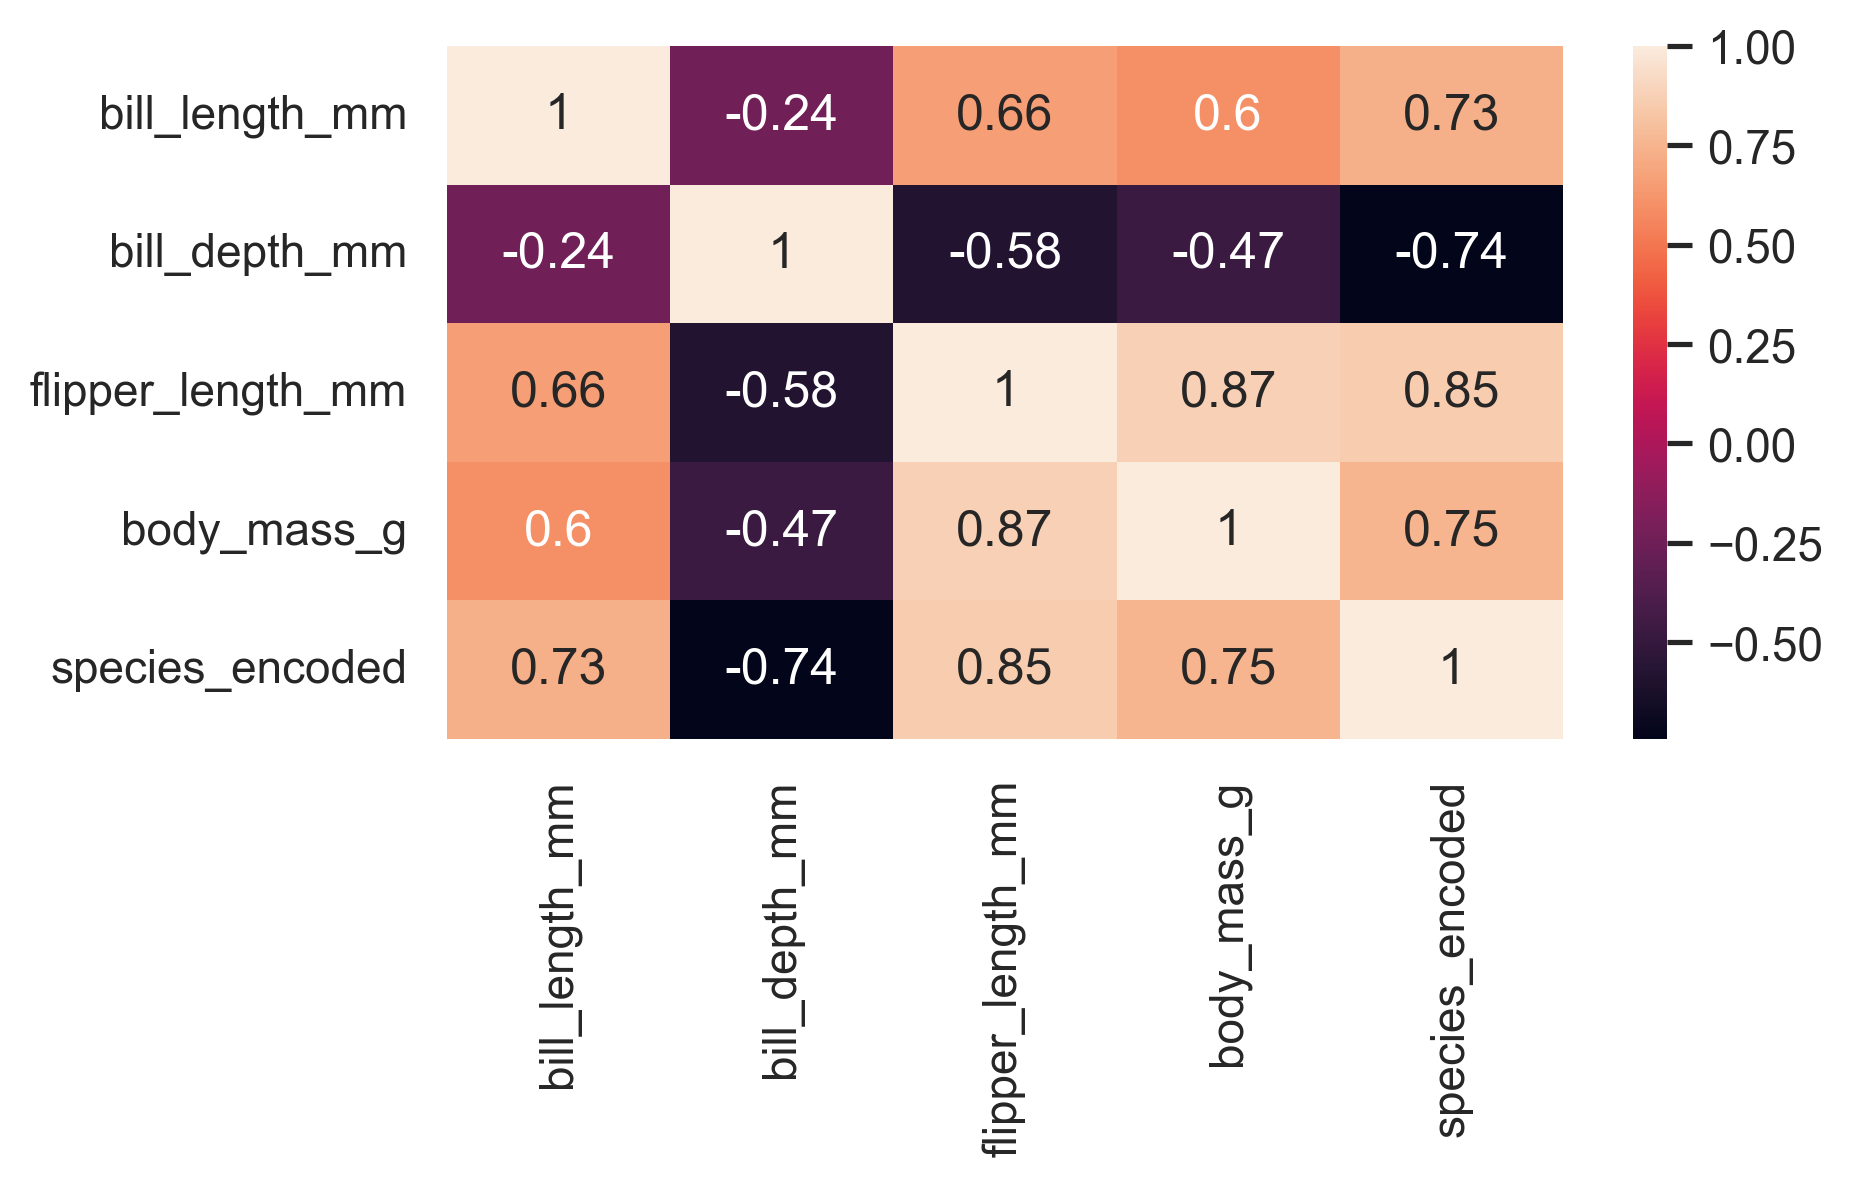

In [24]:
# Create heatmap of correlations using numeric data
sns.heatmap(numeric_data.corr(), annot=True)